# PREDICTING INSURANCE PURCHASE

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [2]:
## Create a Logistic Regression object lr
lr = LogisticRegression()

In [3]:
CarInsurance = pd.read_csv("LR_CarInsurance.csv")

In [4]:
CarInsurance.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [5]:
CarInsurance.tail()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0
3999,4000,45,services,married,primary,0,137,1,0,NaN,9,may,2,-1,0,NaN,13:31:48,13:36:22,0


In [7]:
CarInsurance.shape

(4000, 19)

In [8]:
CarInsurance.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [8]:
dupli = CarInsurance[CarInsurance.duplicated()]
dupli

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance


In [9]:
# No duplicate Rows
# But Missing Value Exists
print(169/4000*100)
print(902/4000*100)
print(3042/4000*100)
print(19/4000*100)

4.2250000000000005
22.55
76.05
0.475


In [10]:
# 76% of missing data in Outcome so let drop the column 
# 4% ,0.4% and 22.5% of missing value lets fill them with mode since its is categorical data

In [6]:
df1 = CarInsurance

In [7]:
df1.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

<Axes: >

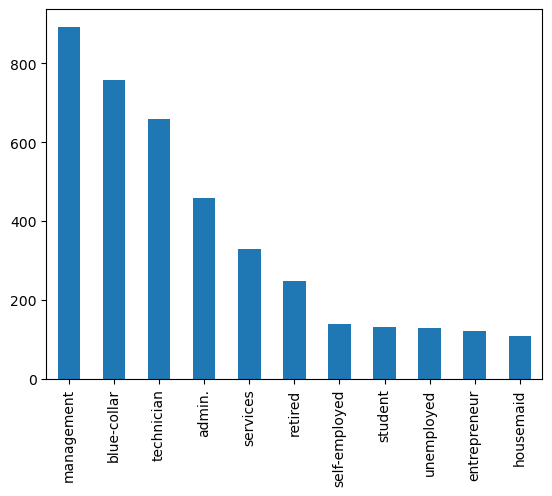

In [11]:
df1['Job'].value_counts().plot(kind = 'bar') ## Many Sector

In [8]:
# Mode could be a useful parameter to fill Na values
df1['Job'] = df1['Job'].fillna(df1['Job'].mode()[0])

In [9]:
df1.isnull().sum()

Id                     0
Age                    0
Job                    0
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [10]:
drop_col = ['Outcome']

In [11]:
drop_df = df1

In [12]:
drop_df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [13]:
drop_df = drop_df.drop(drop_col, axis = 1) # Droping both the columns

In [14]:
drop_df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,14:35:44,14:38:56,0


In [15]:
drop_df.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [16]:
drop_df.isnull().sum()

Id                    0
Age                   0
Job                   0
Marital               0
Education           169
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       902
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
CallStart             0
CallEnd               0
CarInsurance          0
dtype: int64

<Axes: >

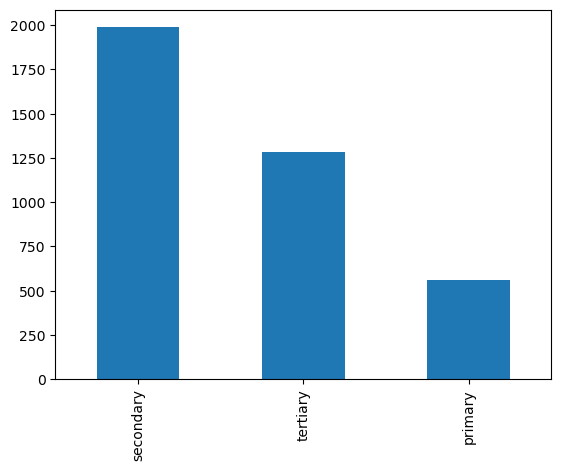

In [17]:
drop_df['Education'].value_counts().plot(kind = 'bar') ## Many Sector

In [18]:
# Mode could be a useful parameter to fill Na values
drop_df['Education'] = drop_df['Education'].fillna(drop_df['Education'].mode()[0])

<Axes: >

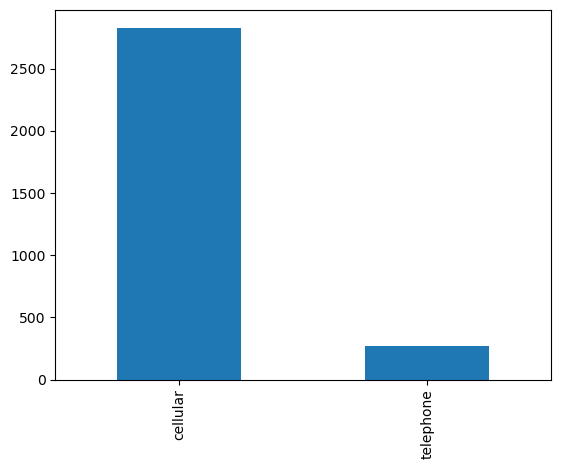

In [19]:
drop_df['Communication'].value_counts().plot(kind = 'bar') ## Many Sector

In [20]:
drop_df['Communication'] = drop_df['Communication'].fillna(drop_df['Communication'].mode()[0])

In [21]:
drop_df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,14:35:44,14:38:56,0


In [22]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               4000 non-null   object
 3   Marital           4000 non-null   object
 4   Education         4000 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     4000 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  CallStart         4000 non-null   object
 16  CallEnd           4000 non-null   object
 17  CarInsurance  

In [23]:
drop_df1 = drop_df

import seaborn as sns
import matplotlib.pyplot as plt

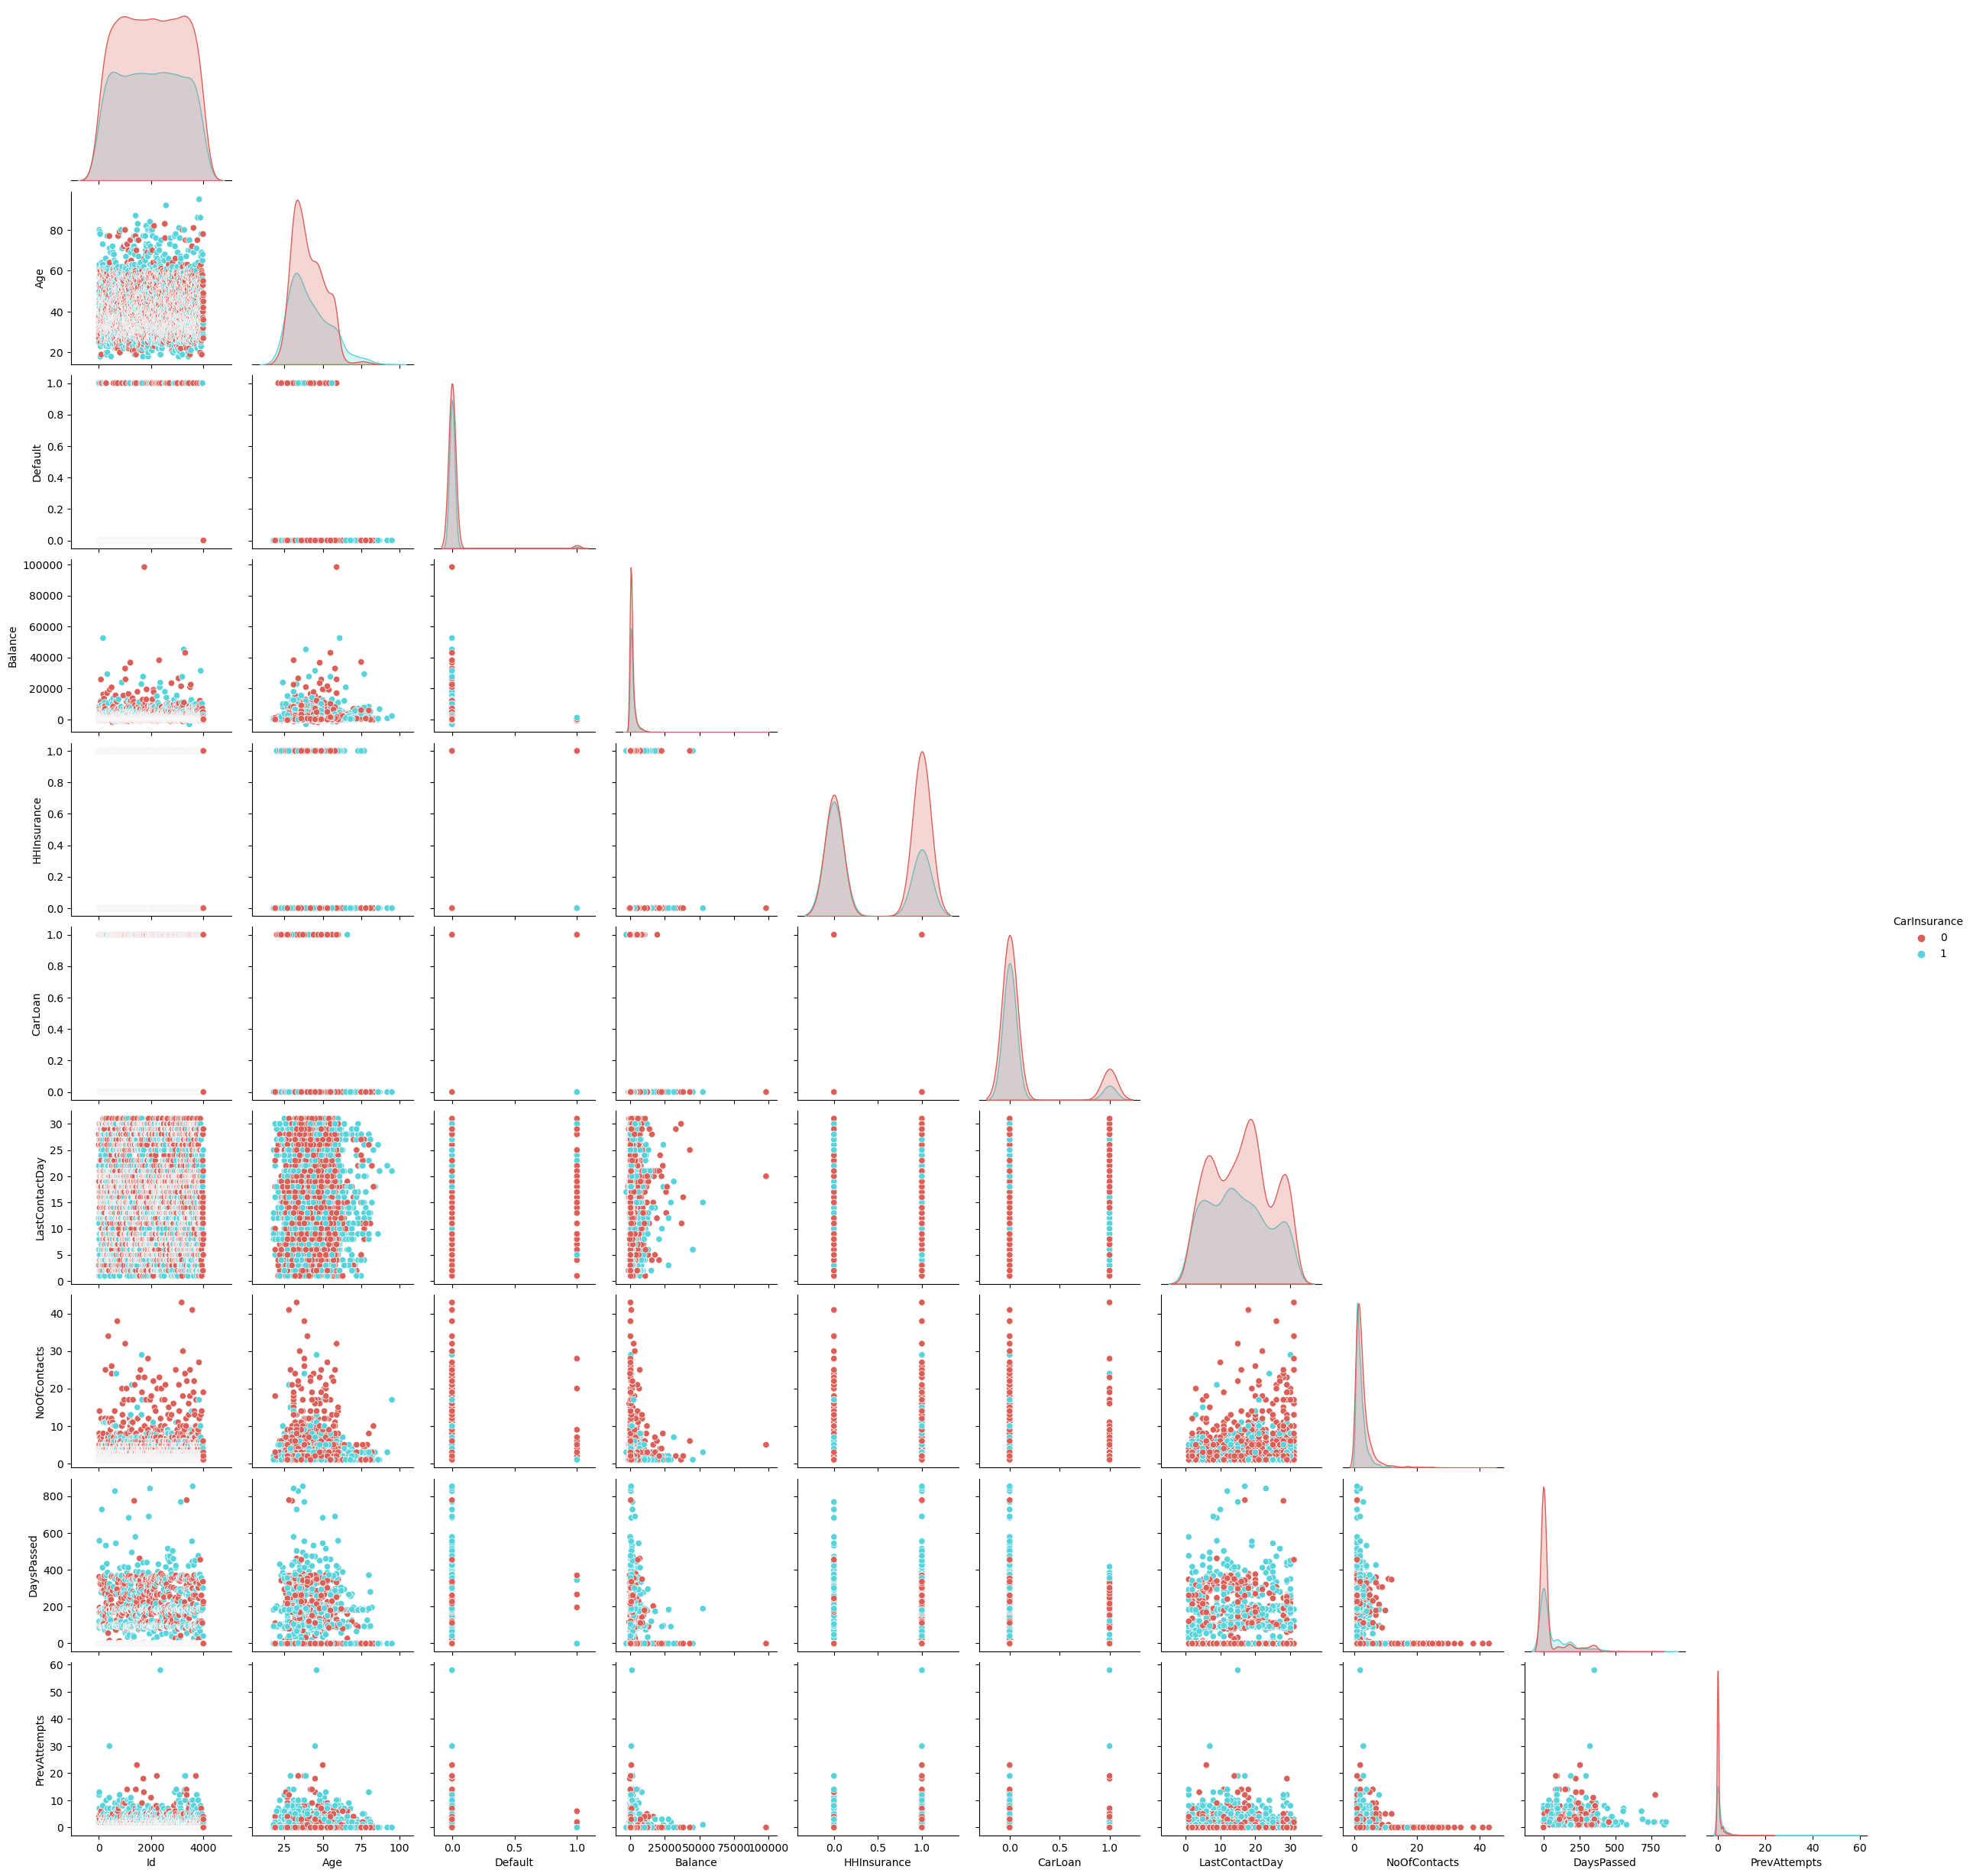

In [29]:
##  Plot only the lower triangle and Different Color
## Return hues with constant lightness and saturation in the HLS system.
sns.pairplot(drop_df1, hue = 'CarInsurance', corner = True , palette='hls')
plt.show()

In [28]:
drop_df1.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [29]:
drop_df1.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,14:35:44,14:38:56,0


In [24]:
drop_df1.nunique()

Id                  4000
Age                   70
Job                   11
Marital                3
Education              3
Default                2
Balance             2178
HHInsurance            2
CarLoan                2
Communication          2
LastContactDay        31
LastContactMonth      12
NoOfContacts          35
DaysPassed           330
PrevAttempts          20
CallStart           3777
CallEnd             3764
CarInsurance           2
dtype: int64

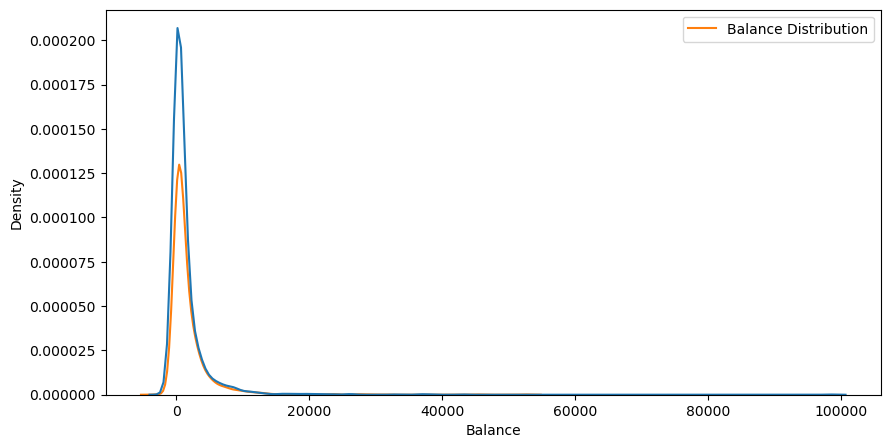

In [37]:
#sns.set_context('notebook')
#sns.set_palette('icefire')
plt.figure(figsize=(10,5))
sns.kdeplot(drop_df1,x='Balance',hue='CarInsurance')
plt.legend(['Balance Distribution'])

C:\Users\sagar\AppData\Local\Temp\ipykernel_14584\2160690717.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(drop_df1,x='Age',palette='icefire')


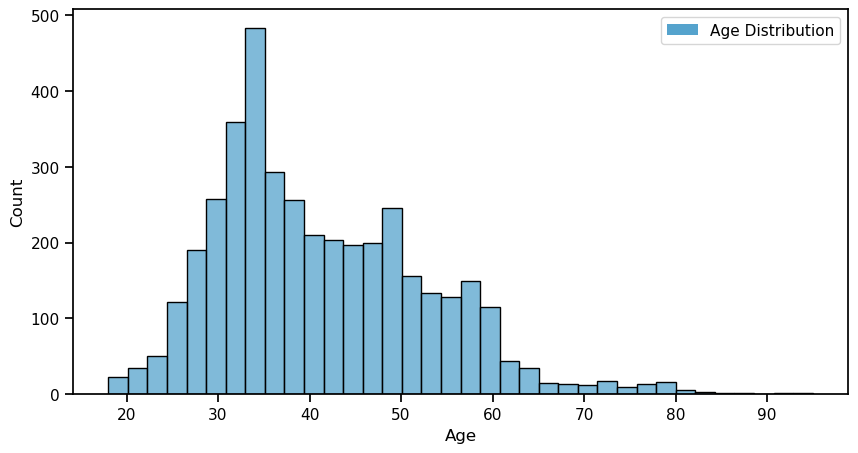

In [41]:
sns.set_context('notebook')
sns.set_palette('icefire')
plt.figure(figsize=(10,5))
sns.histplot(drop_df1,x='Age',palette='icefire')
plt.legend(['Age Distribution'])

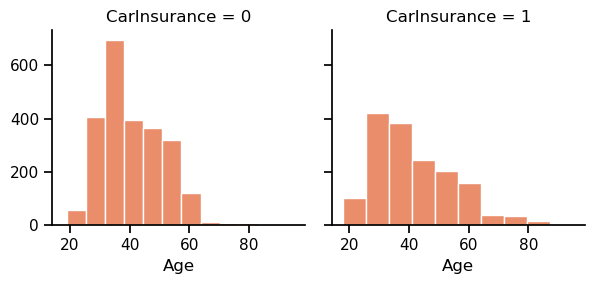

In [62]:
sns.set_palette('flare')
graph = sns.FacetGrid(drop_df1, col ="CarInsurance")
graph.map(plt.hist, "Age", edgecolor ="w").add_legend()

<Axes: xlabel='CarInsurance', ylabel='Balance'>

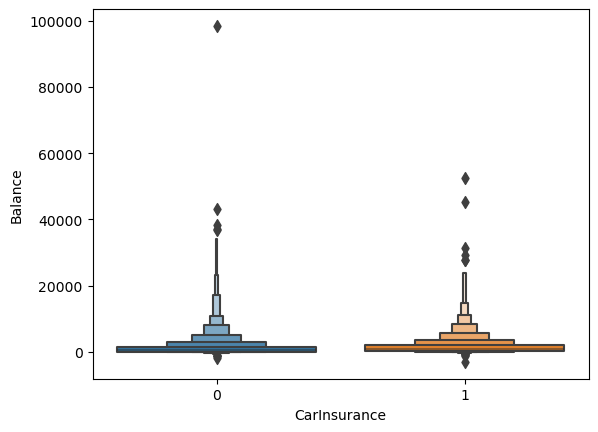

In [39]:
sns.boxenplot(x="CarInsurance", y="Balance", data=drop_df1)

<Axes: xlabel='Job', ylabel='count'>

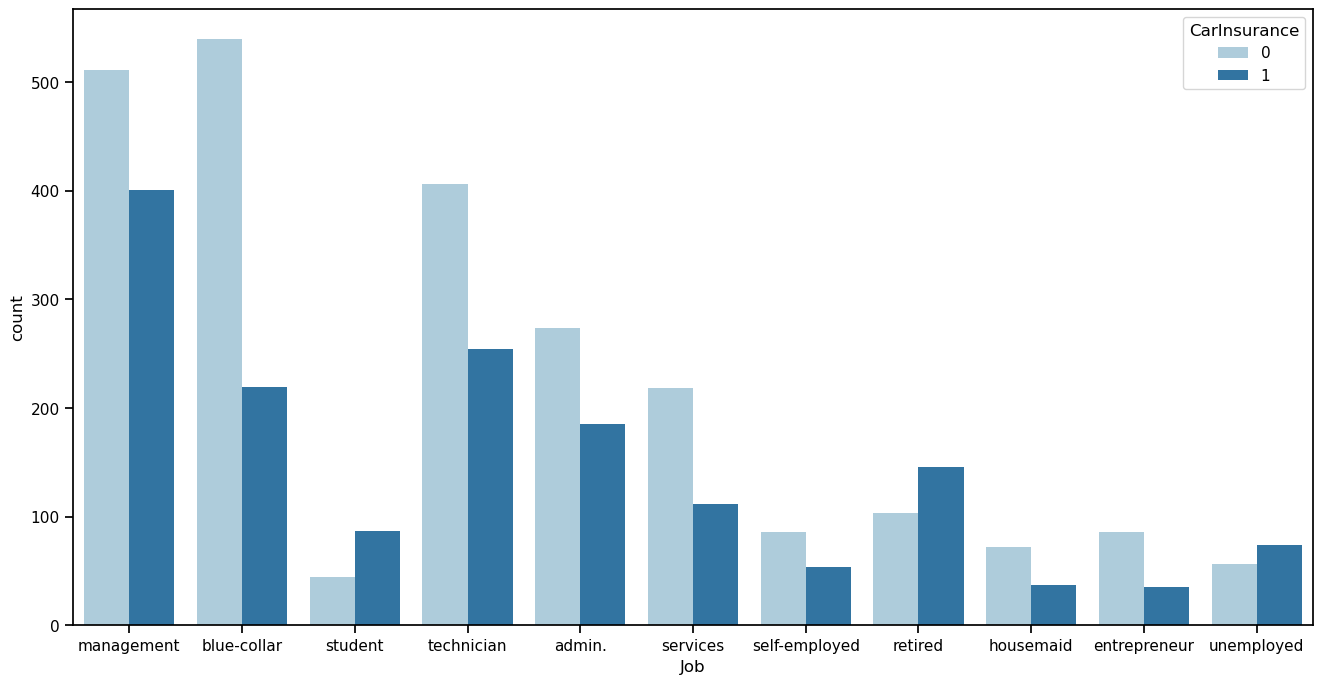

In [52]:
plt.figure(figsize=(16,8))
sns.countplot(x='Job', hue='CarInsurance', data=drop_df1, palette="Paired")

<Axes: xlabel='Marital', ylabel='Balance'>

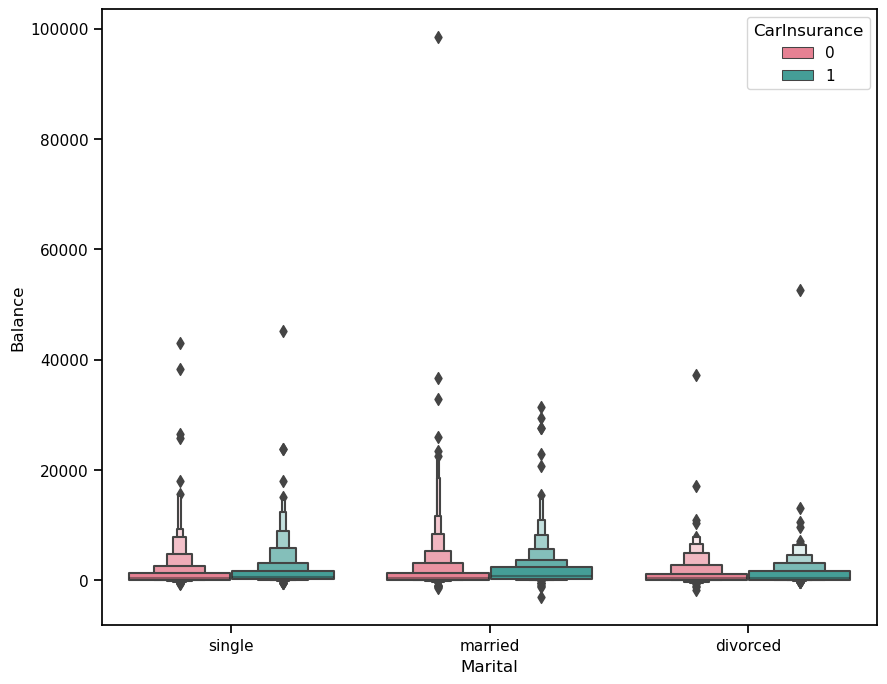

In [72]:
plt.figure(figsize=(10,8))
sns.boxenplot(x="Marital", y="Balance", hue='CarInsurance', data=drop_df, palette='husl')

<Axes: xlabel='Education', ylabel='Balance'>

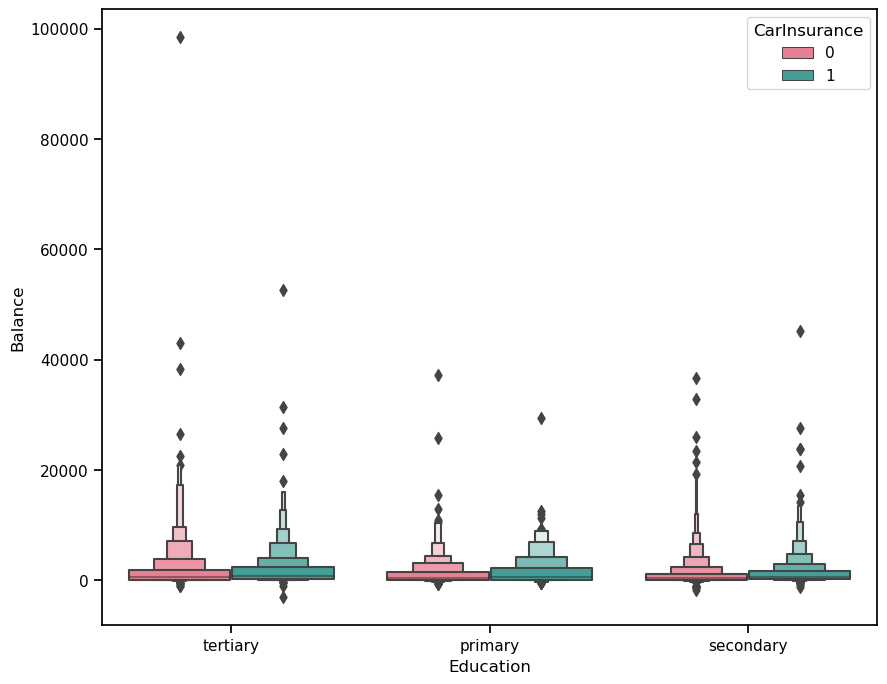

In [74]:
plt.figure(figsize=(10,8))
sns.boxenplot(x="Education", y="Balance", hue='CarInsurance', data=drop_df, palette='husl')

<Axes: xlabel='Education', ylabel='count'>

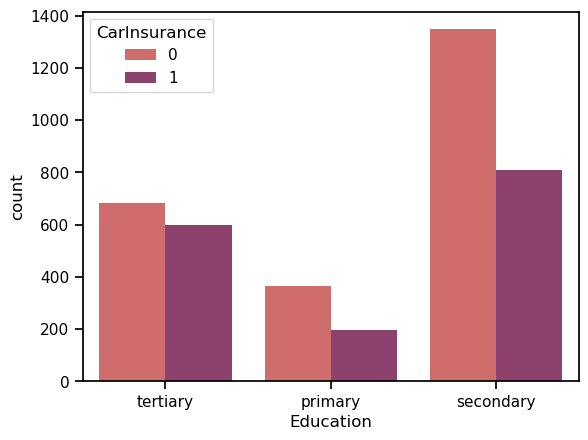

In [77]:
sns.countplot(x="Education", hue='CarInsurance', data=drop_df, palette='flare')

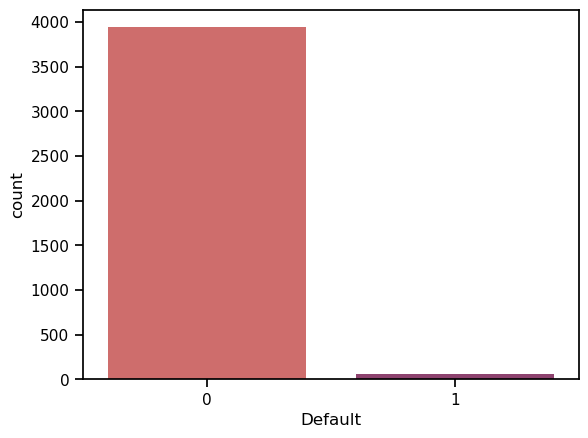

In [91]:
sns.countplot(x="Default", data=drop_df, palette='flare')
plt.show()

<Axes: xlabel='Default', ylabel='Balance'>

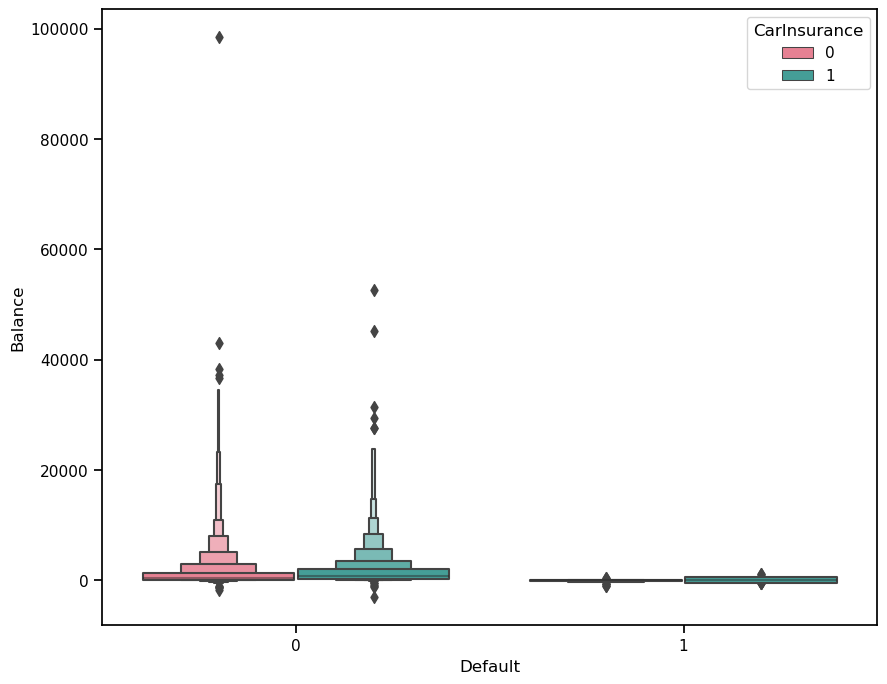

In [92]:
plt.figure(figsize=(10,8))
sns.boxenplot(x="Default", y="Balance", hue='CarInsurance', data=drop_df, palette='husl')

<Axes: xlabel='Default', ylabel='count'>

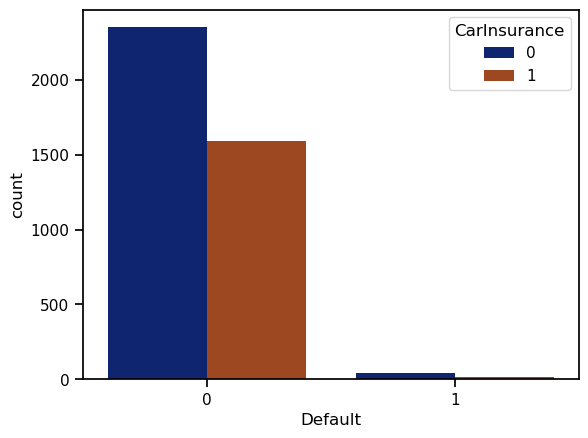

In [89]:
sns.countplot(x="Default", hue='CarInsurance', data=drop_df, palette='dark')

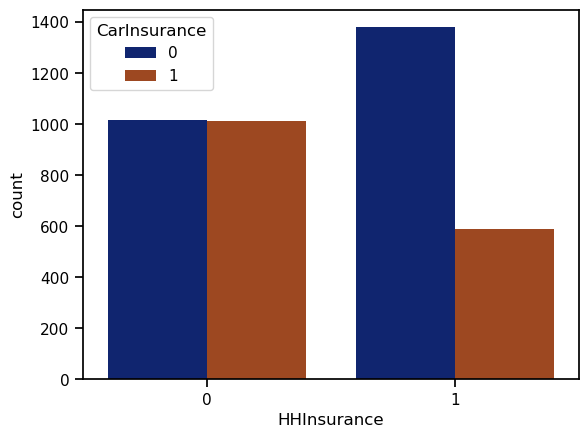

In [93]:
sns.countplot(x="HHInsurance", hue='CarInsurance', data=drop_df, palette='dark')
plt.show()

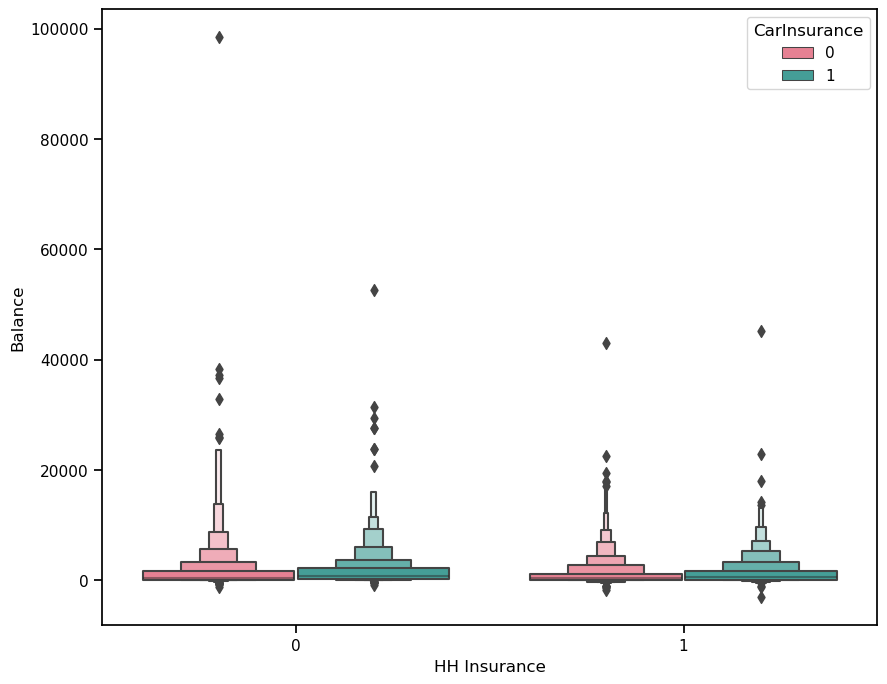

In [95]:
plt.figure(figsize=(10,8))
sns.boxenplot(x="HHInsurance", y="Balance", hue='CarInsurance', data=drop_df, palette='husl')
plt.xlabel("HH Insurance")
plt.show()

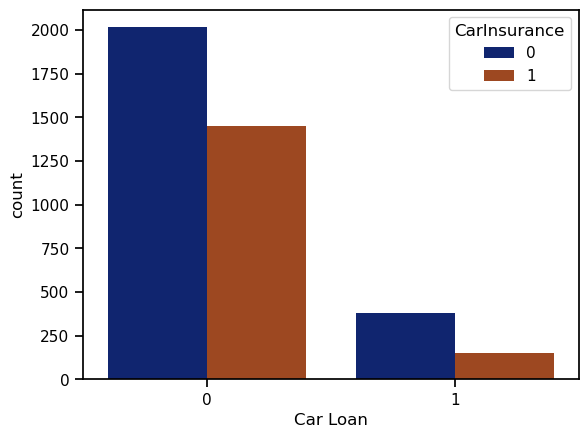

In [100]:
sns.countplot(x="CarLoan", hue='CarInsurance', data=drop_df, palette='dark')
plt.xlabel("Car Loan")
plt.show()

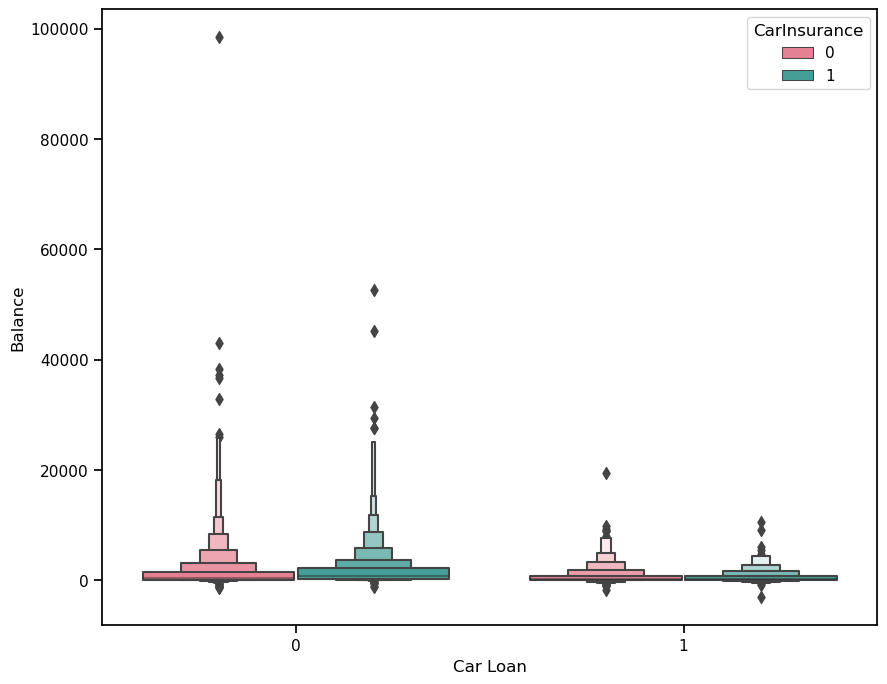

In [99]:
plt.figure(figsize=(10,8))
sns.boxenplot(x="CarLoan", y="Balance", hue='CarInsurance', data=drop_df, palette='husl')
plt.xlabel("Car Loan")
plt.show()

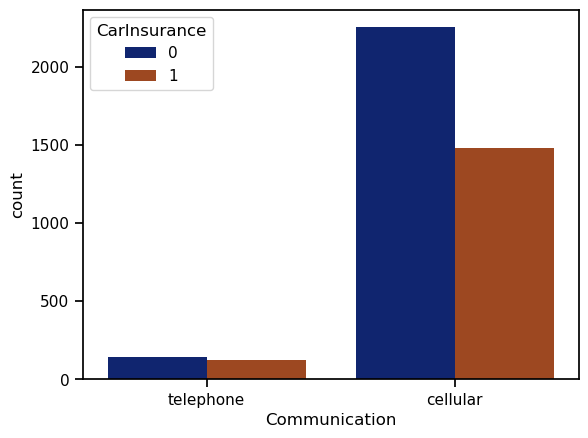

In [101]:
sns.countplot(x="Communication", hue='CarInsurance', data=drop_df, palette='dark')
# plt.xlabel("Car Loan")
plt.show()

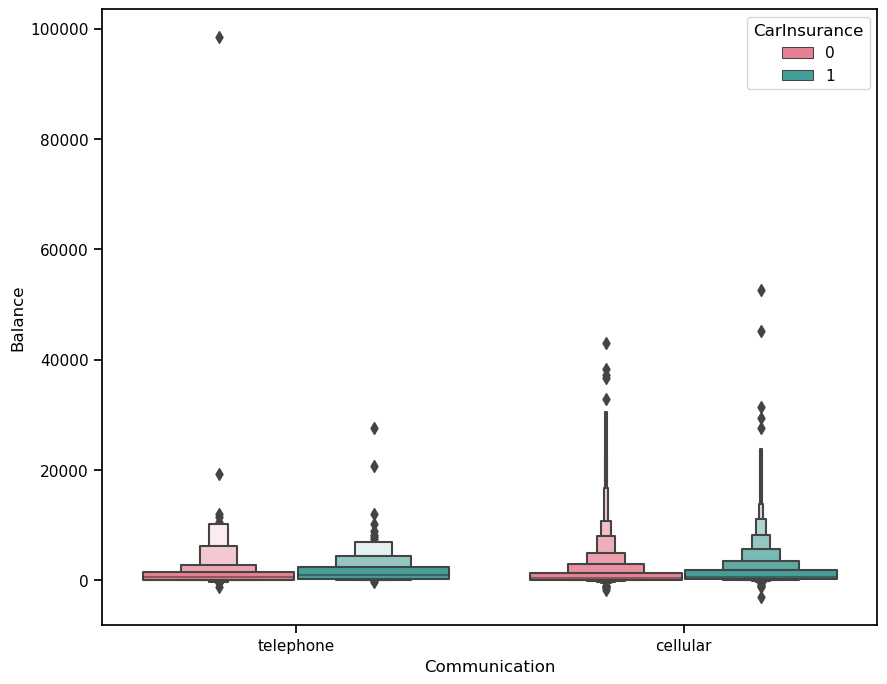

In [102]:
plt.figure(figsize=(10,8))
sns.boxenplot(x="Communication", y="Balance", hue='CarInsurance', data=drop_df, palette='husl')
# plt.xlabel("Car Loan")
plt.show()

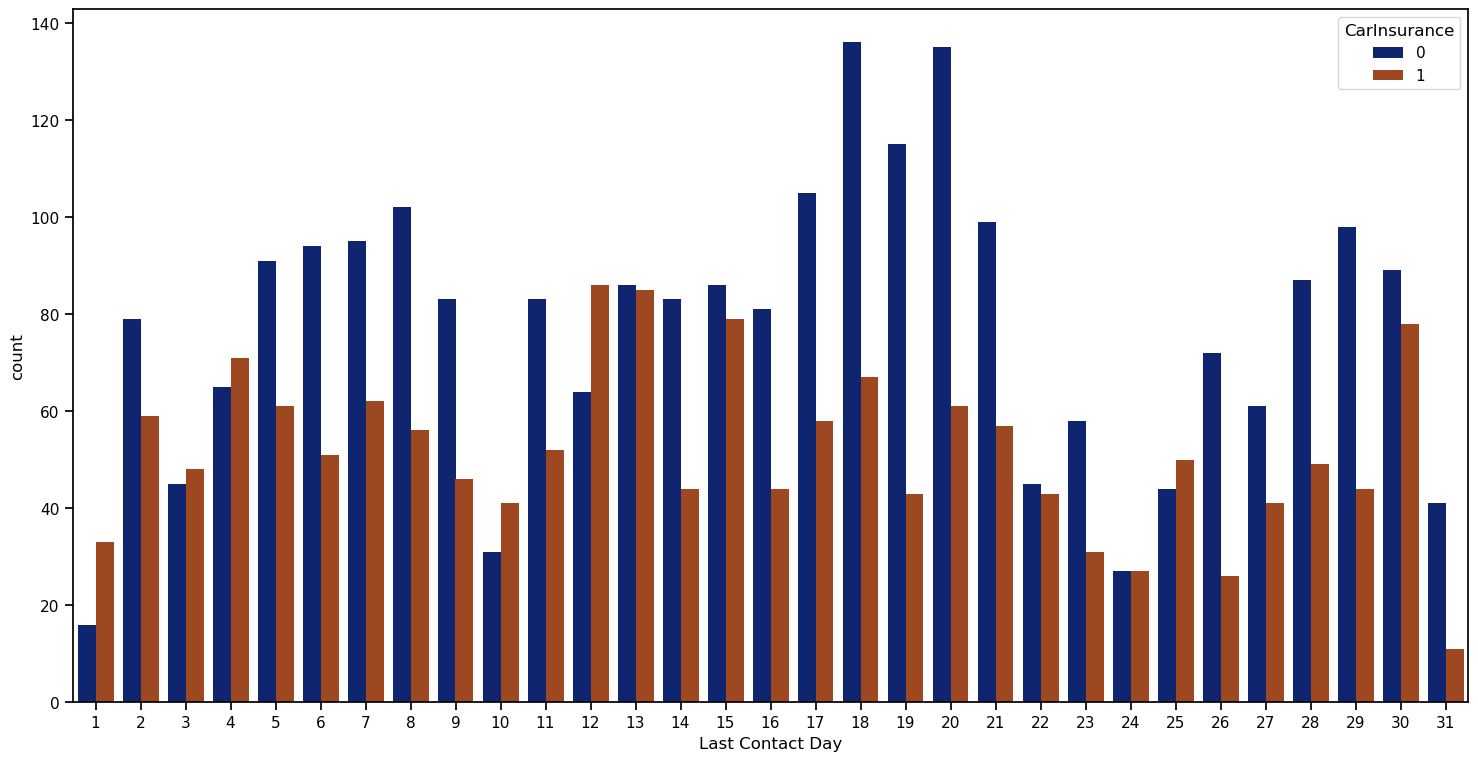

In [104]:
plt.figure(figsize=(18,9))
sns.countplot(x="LastContactDay", hue='CarInsurance', data=drop_df, palette='dark')
plt.xlabel("Last Contact Day")
plt.show()

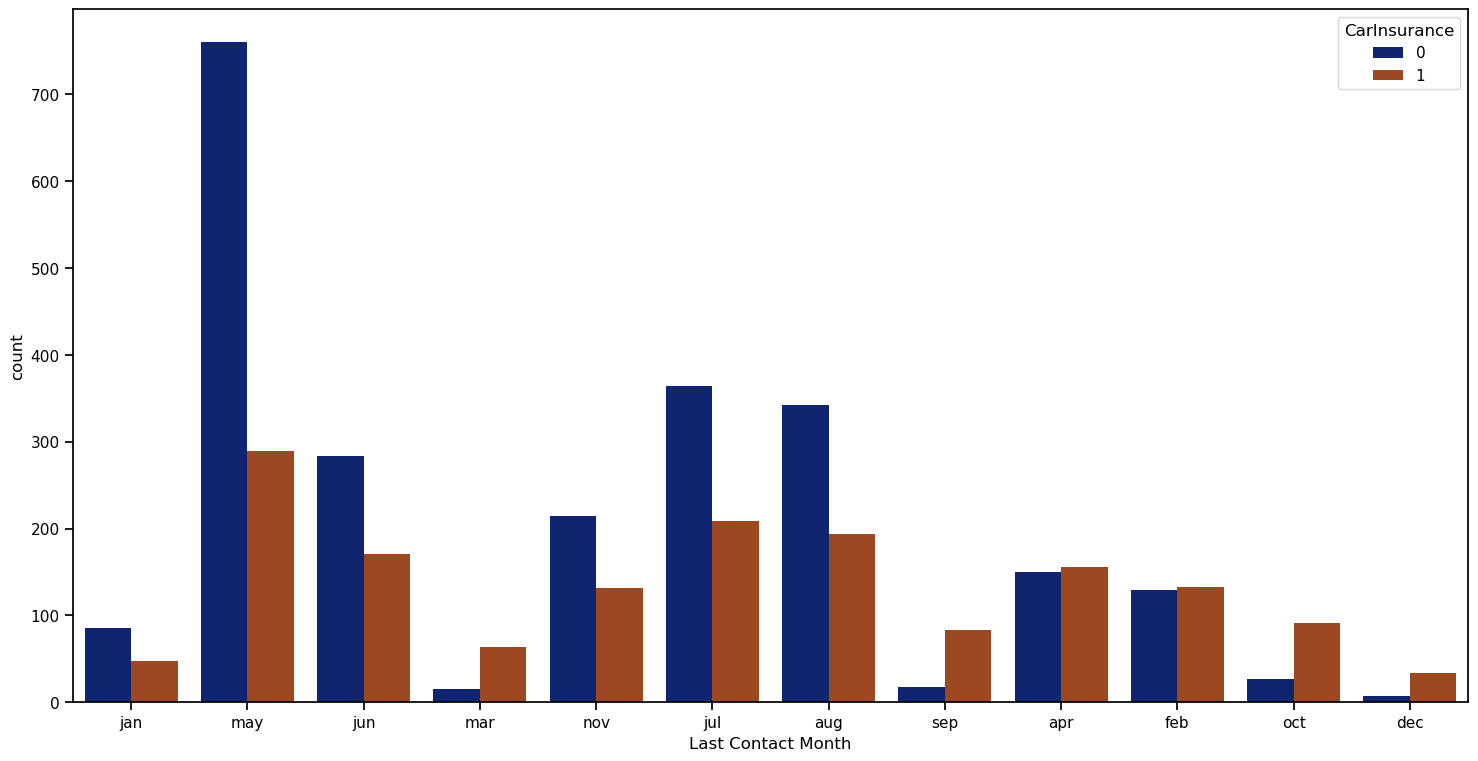

In [105]:
plt.figure(figsize=(18,9))
sns.countplot(x="LastContactMonth", hue='CarInsurance', data=drop_df, palette='dark')
plt.xlabel("Last Contact Month")
plt.show()

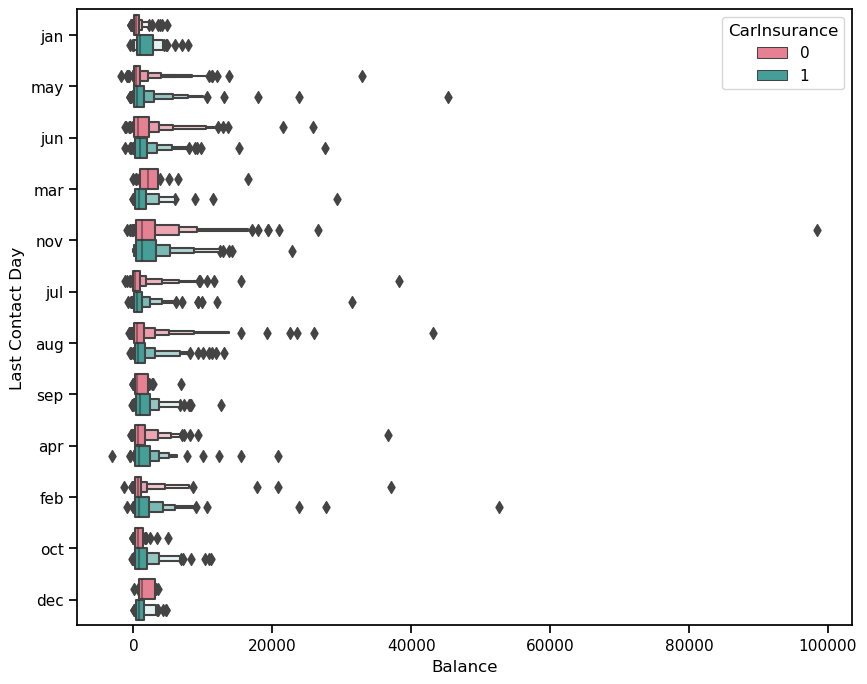

In [107]:
plt.figure(figsize=(10,8))
sns.boxenplot(y="LastContactMonth", x="Balance", hue='CarInsurance', data=drop_df, palette='husl')
plt.ylabel("Last Contact Day")
plt.show()

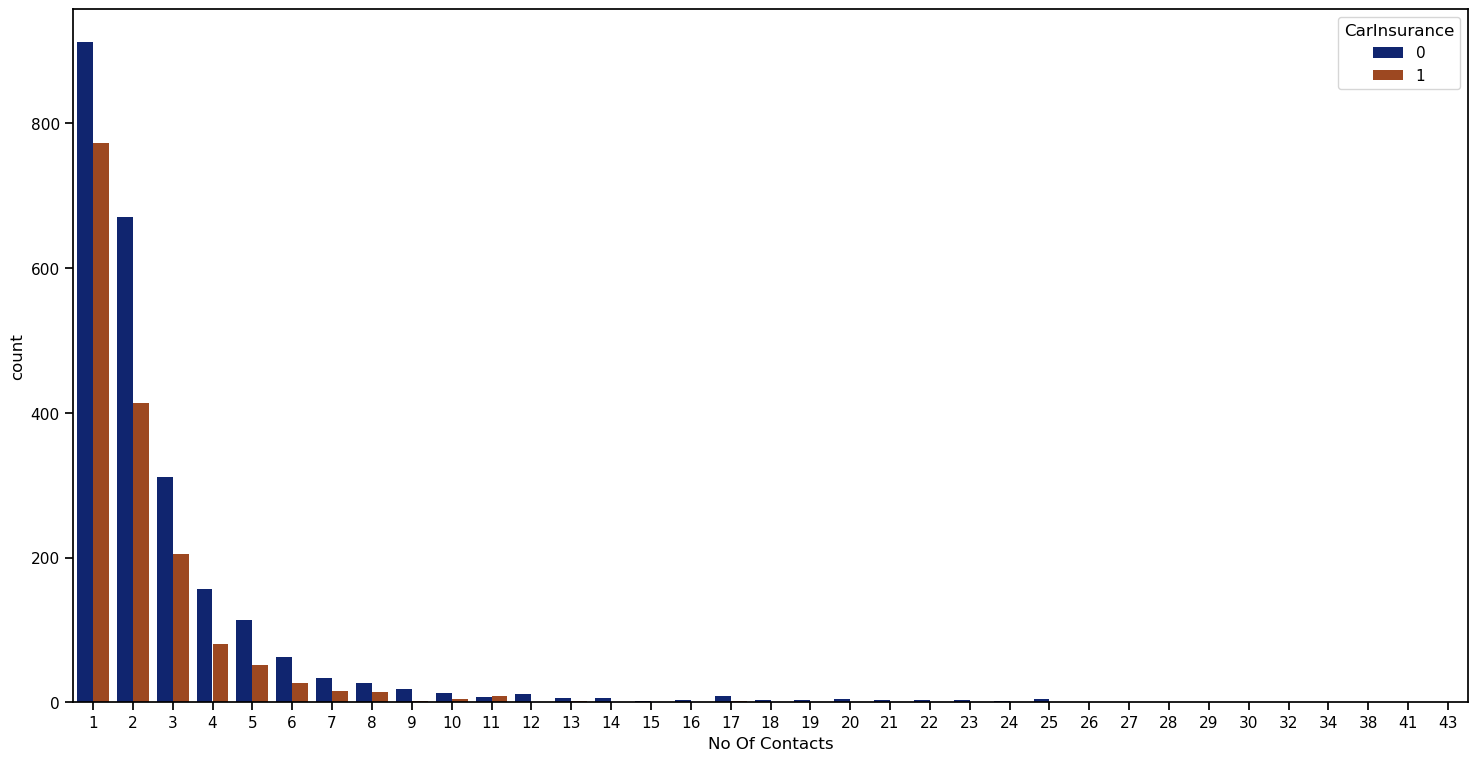

In [108]:
plt.figure(figsize=(18,9))
sns.countplot(x="NoOfContacts", hue='CarInsurance', data=drop_df, palette='dark')
plt.xlabel("No Of Contacts")
plt.show()

In [110]:
drop_df.DaysPassed.value_counts()

-1      3042
 92       38
 182      33
 183      24
 91       24
        ... 
 212       1
 226       1
 76        1
 388       1
 40        1
Name: DaysPassed, Length: 330, dtype: int64

In [113]:
drop_df.PrevAttempts.value_counts()

0     3042
1      335
2      251
3      125
4       79
5       60
6       25
7       21
8       18
10      10
9        9
12       5
14       5
13       4
19       4
11       3
30       1
23       1
18       1
58       1
Name: PrevAttempts, dtype: int64

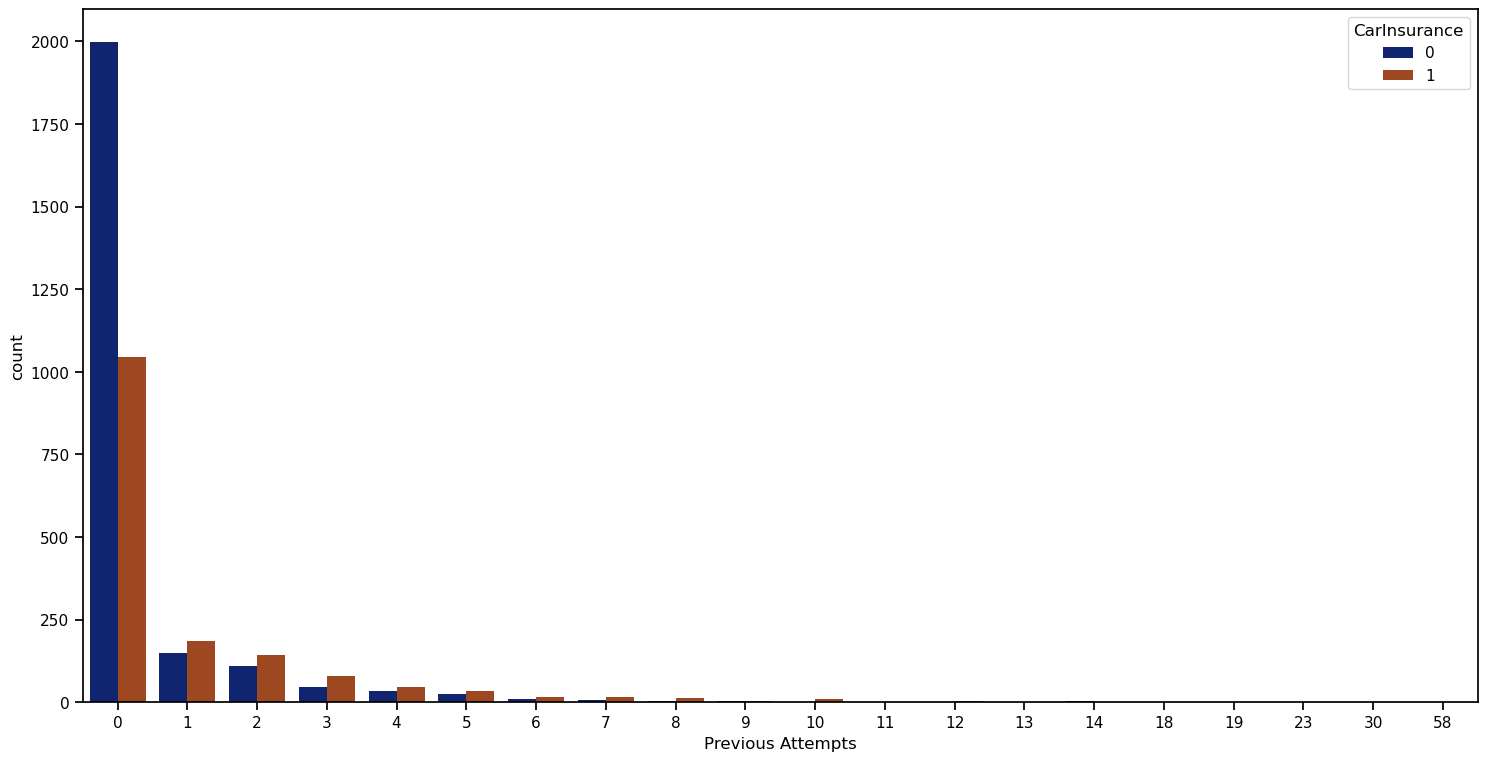

In [114]:
plt.figure(figsize=(18,9))
sns.countplot(x="PrevAttempts", hue='CarInsurance', data=drop_df, palette='dark')
plt.xlabel("Previous Attempts")
plt.show()

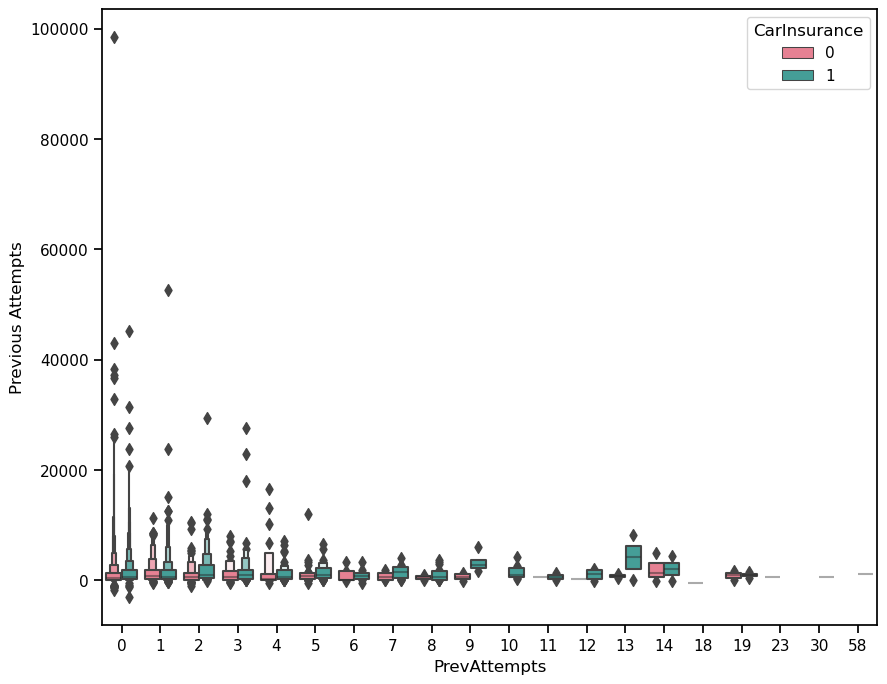

In [116]:
plt.figure(figsize=(10,8))
sns.boxenplot(x="PrevAttempts", y="Balance", hue='CarInsurance', data=drop_df, palette='husl')
plt.ylabel("Previous Attempts")
plt.show()

In [25]:
## WE need continuous variables for regression 
## so we need to split the dataset as numeric and categorical
df_num = drop_df1[['Age','Default', 'Balance',
       'HHInsurance', 'CarLoan','LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'CallStart', 'CallEnd','CarInsurance']]

In [26]:
df_num.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,32,0,1218,1,0,28,2,-1,0,13:45:20,13:46:30,0
1,32,0,1156,1,0,26,5,-1,0,14:49:03,14:52:08,0
2,29,0,637,1,0,3,1,119,1,16:30:24,16:36:04,1
3,25,0,373,1,0,11,2,-1,0,12:06:43,12:20:22,1
4,30,0,2694,0,0,3,1,-1,0,14:35:44,14:38:56,0


In [27]:
df_dummy=drop_df1[['Job', 'Marital', 'Education','Communication','LastContactMonth']]
df_dummy.head()

,Job,Marital,Education,Communication,LastContactMonth
0,management,single,tertiary,telephone,jan
1,blue-collar,married,primary,cellular,may
2,management,single,tertiary,cellular,jun
3,student,single,primary,cellular,may
4,management,married,tertiary,cellular,jun


In [28]:
## Now Change Categorical variables to continuous variables using the DUMMY VARIABLE
df_dummy1 = pd.get_dummies(drop_df1[['Job', 'Marital', 'Education','Communication','LastContactMonth']])

In [29]:
df_dummy1.head()

,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,...,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
df_dummy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Job_admin.               4000 non-null   uint8
 1   Job_blue-collar          4000 non-null   uint8
 2   Job_entrepreneur         4000 non-null   uint8
 3   Job_housemaid            4000 non-null   uint8
 4   Job_management           4000 non-null   uint8
 5   Job_retired              4000 non-null   uint8
 6   Job_self-employed        4000 non-null   uint8
 7   Job_services             4000 non-null   uint8
 8   Job_student              4000 non-null   uint8
 9   Job_technician           4000 non-null   uint8
 10  Job_unemployed           4000 non-null   uint8
 11  Marital_divorced         4000 non-null   uint8
 12  Marital_married          4000 non-null   uint8
 13  Marital_single           4000 non-null   uint8
 14  Education_primary        4000 non-null   uint8
 15  Educ

In [31]:
df_final=pd.concat([df_num, df_dummy1], axis = 1) # axis =1 (JOIN THE DATAFRAME COLUMN-WISE)

In [32]:
df_final.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CallStart,...,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep
0,32,0,1218,1,0,28,2,-1,0,13:45:20,...,0,0,1,0,0,0,0,0,0,0
1,32,0,1156,1,0,26,5,-1,0,14:49:03,...,0,0,0,0,0,0,1,0,0,0
2,29,0,637,1,0,3,1,119,1,16:30:24,...,0,0,0,0,1,0,0,0,0,0
3,25,0,373,1,0,11,2,-1,0,12:06:43,...,0,0,0,0,0,0,1,0,0,0
4,30,0,2694,0,0,3,1,-1,0,14:35:44,...,0,0,0,0,1,0,0,0,0,0


In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4000 non-null   int64 
 1   Default                  4000 non-null   int64 
 2   Balance                  4000 non-null   int64 
 3   HHInsurance              4000 non-null   int64 
 4   CarLoan                  4000 non-null   int64 
 5   LastContactDay           4000 non-null   int64 
 6   NoOfContacts             4000 non-null   int64 
 7   DaysPassed               4000 non-null   int64 
 8   PrevAttempts             4000 non-null   int64 
 9   CallStart                4000 non-null   object
 10  CallEnd                  4000 non-null   object
 11  CarInsurance             4000 non-null   int64 
 12  Job_admin.               4000 non-null   uint8 
 13  Job_blue-collar          4000 non-null   uint8 
 14  Job_entrepreneur         4000 non-null  

In [34]:
df_final.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CallStart,...,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep
0,32,0,1218,1,0,28,2,-1,0,13:45:20,...,0,0,1,0,0,0,0,0,0,0
1,32,0,1156,1,0,26,5,-1,0,14:49:03,...,0,0,0,0,0,0,1,0,0,0
2,29,0,637,1,0,3,1,119,1,16:30:24,...,0,0,0,0,1,0,0,0,0,0
3,25,0,373,1,0,11,2,-1,0,12:06:43,...,0,0,0,0,0,0,1,0,0,0
4,30,0,2694,0,0,3,1,-1,0,14:35:44,...,0,0,0,0,1,0,0,0,0,0


In [35]:
df_final.columns

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CallStart', 'CallEnd',
       'CarInsurance', 'Job_admin.', 'Job_blue-collar', 'Job_entrepreneur',
       'Job_housemaid', 'Job_management', 'Job_retired', 'Job_self-employed',
       'Job_services', 'Job_student', 'Job_technician', 'Job_unemployed',
       'Marital_divorced', 'Marital_married', 'Marital_single',
       'Education_primary', 'Education_secondary', 'Education_tertiary',
       'Communication_cellular', 'Communication_telephone',
       'LastContactMonth_apr', 'LastContactMonth_aug', 'LastContactMonth_dec',
       'LastContactMonth_feb', 'LastContactMonth_jan', 'LastContactMonth_jul',
       'LastContactMonth_jun', 'LastContactMonth_mar', 'LastContactMonth_may',
       'LastContactMonth_nov', 'LastContactMonth_oct', 'LastContactMonth_sep'],
      dtype='object')

In [36]:
import statsmodels.api as sm
x = df_final[['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Job_admin.', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Marital_divorced',
       'Marital_married', 'Marital_single', 'Education_primary',
       'Education_secondary', 'Education_tertiary', 'Communication_cellular',
       'Communication_telephone', 'LastContactMonth_apr',
       'LastContactMonth_aug', 'LastContactMonth_dec', 'LastContactMonth_feb',
       'LastContactMonth_jan', 'LastContactMonth_jul', 'LastContactMonth_jun',
       'LastContactMonth_mar', 'LastContactMonth_may', 'LastContactMonth_nov',
       'LastContactMonth_oct', 'LastContactMonth_sep']]
y = df_final['CarInsurance']
x = sm.add_constant(x)

C:\Users\sagar\AppData\Local\Temp\ipykernel_14340\3593727944.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_num.corr(), annot=True)


<Axes: >

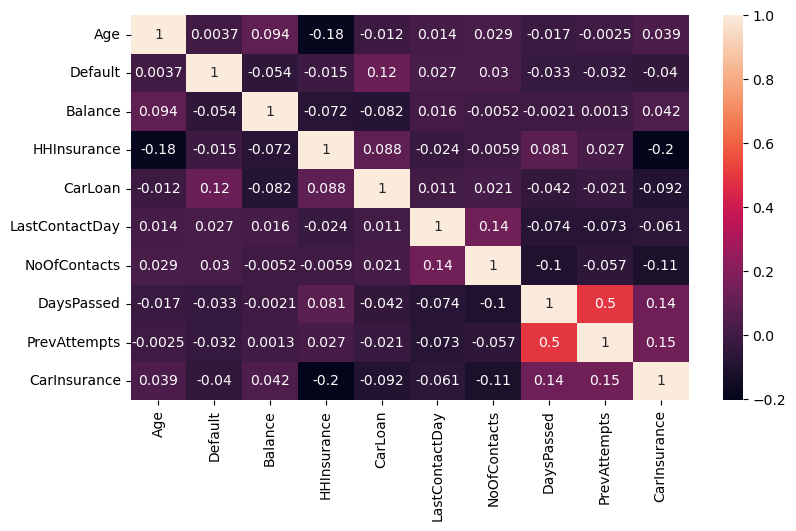

In [37]:
# Let us study the heat map Correlation for multi-collinearity to check assumption 5
plt.figure(figsize=(9,5))
sns.heatmap(df_num.corr(), annot=True)


In [38]:
df_final.shape

(4000, 43)

In [39]:
## Create a Logistic Regression object lr
lr = LogisticRegression()
logit_model = sm.Logit(y,x)

In [40]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.593240
         Iterations 6


In [41]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CarInsurance   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3964
Method:                           MLE   Df Model:                           35
Date:                Fri, 21 Jul 2023   Pseudo R-squ.:                  0.1191
Time:                        20:09:12   Log-Likelihood:                -2373.0
converged:                       True   LL-Null:                       -2693.7
Covariance Type:            nonrobust   LLR p-value:                1.456e-112
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1780   3.65e+06   4.88e-08      1.000   -7.15e+06    7.15e+06
Age                         0.0052      0.004      1.253      0.210      -0.003       0.013
Default                    -0.3690      0.320     -1.152      0.249      -0.997       0.259
Balance                  8.686e-06   9.84e-06      0.883      0.377   -1.06e-05     2.8e-05
HHInsurance                -0.6646      0.082     -8.109      0.000      -0.825      -0.504
CarLoan                    -0.3110      0.112     -2.784      0.005      -0.530      -0.092
LastContactDay             -0.0103      0.005     -2.191      0.028      -0.020      -0.001
NoOfContacts               -0.0710      0.016     -4.517      0.000      -0.102      -0.040
DaysPassed                  0.0013      0.000      3.124      0.002       0.000       0.002
PrevAttempts                0.1038      0.024      4.249      0.000       0.056       0.152
Job_admin.                  0.0546        nan        nan        nan         nan         nan
Job_blue-collar            -0.1338        nan        nan        nan         nan         nan
Job_entrepreneur           -0.4541        nan        nan        nan         nan         nan
Job_housemaid              -0.2996        nan        nan        nan         nan         nan
Job_management             -0.1080        nan        nan        nan         nan         nan
Job_retired                 0.3008        nan        nan        nan         nan         nan
Job_self-employed          -0.1824        nan        nan        nan         nan         nan
Job_services               -0.0954        nan        nan        nan         nan         nan
Job_student                 0.6018        nan        nan        nan         nan         nan
Job_technician             -0.0464        nan        nan        nan         nan         nan
Job_unemployed              0.5404        nan        nan        nan         nan         nan
Marital_divorced            0.1173        nan        nan        nan         nan         nan
Marital_married            -0.1301        nan        nan        nan         nan         nan
Marital_single              0.1908        nan        nan        nan         nan         nan
Education_primary          -0.0614        nan        nan        nan         nan         nan
Education_secondary        -0.0450        nan        nan        nan         nan         nan
Education_tertiary          0.2844        nan        nan        nan         nan         nan
Communication_cellular      0.1132        nan        nan        nan         nan         nan
Communication_telephone     0.0648        nan        nan        nan         nan         nan
LastContactMonth_apr        0.0855        nan        nan        nan         nan         nan
LastContactMonth_aug       -0.7018        nan        nan        nan         nan         nan
LastContactMonth_dec        1.0839        nan        nan        nan         nan         nan
LastContactMonth_feb 

In [42]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                  Pseudo R-squared:       0.119      
Dependent Variable:         CarInsurance           AIC:                    4817.9230  
Date:                       2023-07-21 20:09       BIC:                    5044.5088  
No. Observations:           4000                   Log-Likelihood:         -2373.0    
Df Model:                   35                     LL-Null:                -2693.7    
Df Residuals:               3964                   LLR p-value:            1.4559e-112
Converged:                  1.0000                 Scale:                  1.0000     
No. Iterations:             6.0000                                                    
--------------------------------------------------------------------------------------
                         Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
--------------------------------------------------------------------------------------
const                    0.1780 3646897.3632  0.0000 1.0000 -7147787.3092 7147787.6651
Age                      0.0052       0.0042  1.2533 0.2101       -0.0029       0.0134
Default                 -0.3690       0.3203 -1.1520 0.2493       -0.9968       0.2588
Balance                  0.0000       0.0000  0.8831 0.3772       -0.0000       0.0000
HHInsurance             -0.6646       0.0820 -8.1091 0.0000       -0.8252      -0.5040
CarLoan                 -0.3110       0.1117 -2.7842 0.0054       -0.5299      -0.0921
LastContactDay          -0.0103       0.0047 -2.1909 0.0285       -0.0195      -0.0011
NoOfContacts            -0.0710       0.0157 -4.5174 0.0000       -0.1018      -0.0402
DaysPassed               0.0013       0.0004  3.1243 0.0018        0.0005       0.0020
PrevAttempts             0.1038       0.0244  4.2489 0.0000        0.0559       0.1517
Job_admin.               0.0546          nan     nan    nan           nan          nan
Job_blue-collar         -0.1338          nan     nan    nan           nan          nan
Job_entrepreneur        -0.4541          nan     nan    nan           nan          nan
Job_housemaid           -0.2996          nan     nan    nan           nan          nan
Job_management          -0.1080          nan     nan    nan           nan          nan
Job_retired              0.3008          nan     nan    nan           nan          nan
Job_self-employed       -0.1824          nan     nan    nan           nan          nan
Job_services            -0.0954          nan     nan    nan           nan          nan
Job_student              0.6018          nan     nan    nan           nan          nan
Job_technician          -0.0464          nan     nan    nan           nan          nan
Job_unemployed           0.5404          nan     nan    nan           nan          nan
Marital_divorced         0.1173          nan     nan    nan           nan          nan
Marital_married         -0.1301          nan     nan    nan           nan          nan
Marital_single           0.1908          nan     nan    nan           nan          nan
Education_primary       -0.0614          nan     nan    nan           nan          nan
Education_secondary     -0.0450          nan     nan    nan           nan          nan
Education_tertiary       0.2844          nan     nan    nan           nan          nan
Communication_cellular   0.1132          nan     nan    nan           nan          nan
Communication_telephone  0.0648          nan     nan    nan           nan          nan
LastContactMonth_apr     0.0855          nan     nan    nan           nan          nan
LastContactMonth_aug    -0.7018          nan     nan    nan           nan          nan
LastContactMonth_dec     1.0839          nan     nan    nan           nan          nan
LastContactMonth_feb    -0.3088          nan     nan    nan           na

In [43]:
A = drop_df1[['CallStart', 'CallEnd']]

In [44]:
A.head()

,CallStart,CallEnd
0,13:45:20,13:46:30
1,14:49:03,14:52:08
2,16:30:24,16:36:04
3,12:06:43,12:20:22
4,14:35:44,14:38:56


In [45]:
A = pd.DataFrame(A)

In [46]:
A.head()

,CallStart,CallEnd
0,13:45:20,13:46:30
1,14:49:03,14:52:08
2,16:30:24,16:36:04
3,12:06:43,12:20:22
4,14:35:44,14:38:56


In [47]:
# Convert time columns to Timedelta objects for finding difference
A['CallStart'] = pd.to_timedelta(A['CallStart'])
A['CallEnd'] = pd.to_timedelta(A['CallEnd'])

In [48]:
A.head(5)

,CallStart,CallEnd
0,0 days 13:45:20,0 days 13:46:30
1,0 days 14:49:03,0 days 14:52:08
2,0 days 16:30:24,0 days 16:36:04
3,0 days 12:06:43,0 days 12:20:22
4,0 days 14:35:44,0 days 14:38:56


In [49]:
# Calculate the time difference in minutes
A['Time_Difference'] = (A['CallEnd'] - A['CallStart']).dt.total_seconds() / 60

In [50]:
A.head()

,CallStart,CallEnd,Time_Difference
0,0 days 13:45:20,0 days 13:46:30,1.166667
1,0 days 14:49:03,0 days 14:52:08,3.083333
2,0 days 16:30:24,0 days 16:36:04,5.666667
3,0 days 12:06:43,0 days 12:20:22,13.650000
4,0 days 14:35:44,0 days 14:38:56,3.200000


In [51]:
df_time = A['Time_Difference']

In [52]:
df_time.head()

0     1.166667
1     3.083333
2     5.666667
3    13.650000
4     3.200000
Name: Time_Difference, dtype: float64

In [53]:
df_final=pd.concat([df_final, df_time], axis = 1) # axis =1 (JOIN THE DATAFRAME COLUMN-WISE)

In [54]:
df_final.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CallStart,...,LastContactMonth_feb,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Time_Difference
0,32,0,1218,1,0,28,2,-1,0,13:45:20,...,0,1,0,0,0,0,0,0,0,1.166667
1,32,0,1156,1,0,26,5,-1,0,14:49:03,...,0,0,0,0,0,1,0,0,0,3.083333
2,29,0,637,1,0,3,1,119,1,16:30:24,...,0,0,0,1,0,0,0,0,0,5.666667
3,25,0,373,1,0,11,2,-1,0,12:06:43,...,0,0,0,0,0,1,0,0,0,13.650000
4,30,0,2694,0,0,3,1,-1,0,14:35:44,...,0,0,0,1,0,0,0,0,0,3.200000


In [55]:
df_final.columns

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CallStart', 'CallEnd',
       'CarInsurance', 'Job_admin.', 'Job_blue-collar', 'Job_entrepreneur',
       'Job_housemaid', 'Job_management', 'Job_retired', 'Job_self-employed',
       'Job_services', 'Job_student', 'Job_technician', 'Job_unemployed',
       'Marital_divorced', 'Marital_married', 'Marital_single',
       'Education_primary', 'Education_secondary', 'Education_tertiary',
       'Communication_cellular', 'Communication_telephone',
       'LastContactMonth_apr', 'LastContactMonth_aug', 'LastContactMonth_dec',
       'LastContactMonth_feb', 'LastContactMonth_jan', 'LastContactMonth_jul',
       'LastContactMonth_jun', 'LastContactMonth_mar', 'LastContactMonth_may',
       'LastContactMonth_nov', 'LastContactMonth_oct', 'LastContactMonth_sep',
       'Time_Difference'],
      dtype='object')

C:\Users\sagar\AppData\Local\Temp\ipykernel_14340\2520570451.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.corr()['CarInsurance'].sort_values(ascending = False).plot(kind='bar')


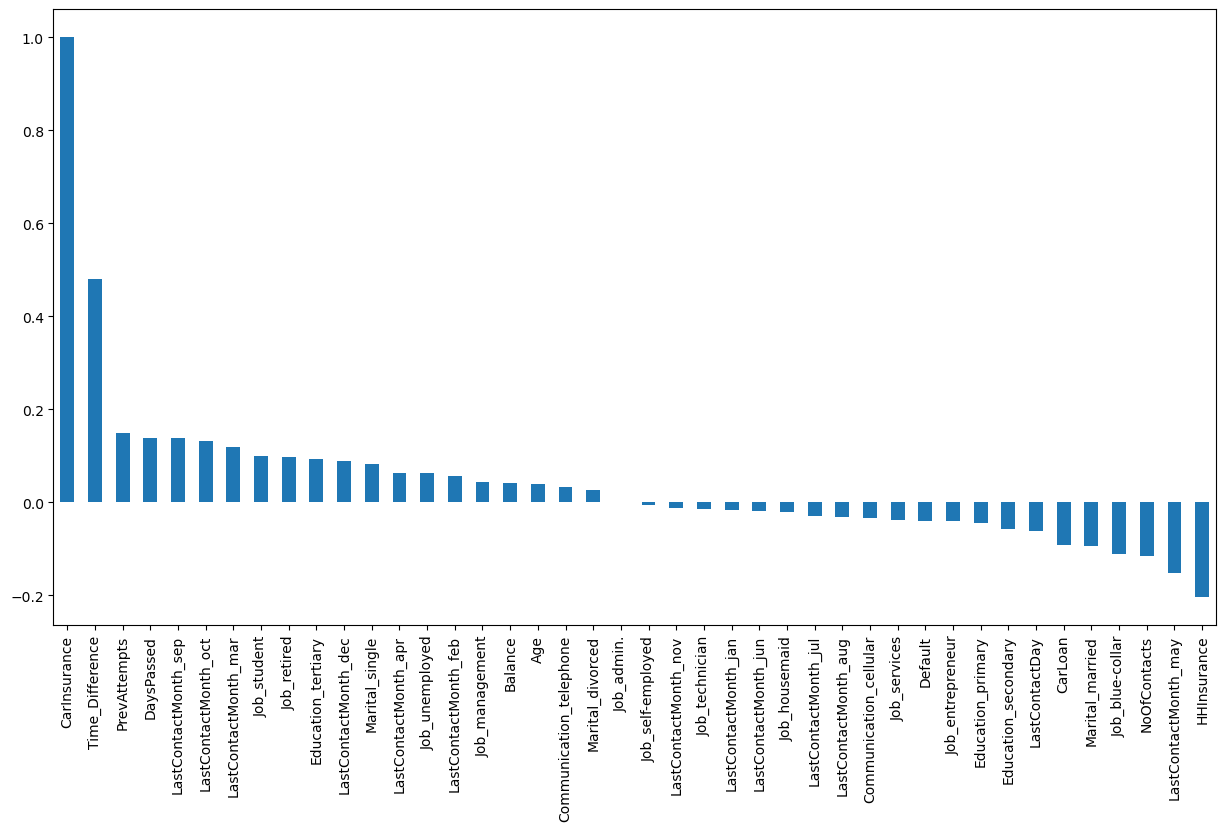

In [92]:
plt.figure(figsize=(15,8))
df_final.corr()['CarInsurance'].sort_values(ascending = False).plot(kind='bar')
plt.show()

In [56]:
import statsmodels.api as sm
x = df_final[['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Job_admin.', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Marital_divorced',
       'Marital_married', 'Marital_single', 'Education_primary',
       'Education_secondary', 'Education_tertiary', 'Communication_cellular',
       'Communication_telephone', 'LastContactMonth_apr',
       'LastContactMonth_aug', 'LastContactMonth_dec', 'LastContactMonth_feb',
       'LastContactMonth_jan', 'LastContactMonth_jul', 'LastContactMonth_jun',
       'LastContactMonth_mar', 'LastContactMonth_may', 'LastContactMonth_nov',
       'LastContactMonth_oct', 'LastContactMonth_sep','Time_Difference']]
y = df_final['CarInsurance']
x = sm.add_constant(x)

In [94]:
df_final.shape

(4000, 44)

In [57]:
logit_model = sm.Logit(y,x)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.419792
         Iterations 8


In [58]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CarInsurance   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3963
Method:                           MLE   Df Model:                           36
Date:                Fri, 21 Jul 2023   Pseudo R-squ.:                  0.3766
Time:                        20:09:26   Log-Likelihood:                -1679.2
converged:                       True   LL-Null:                       -2693.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5116   3.19e+06   -1.6e-07      1.000   -6.25e+06    6.25e+06
Age                         0.0037      0.005      0.720      0.472      -0.006       0.014
Default                    -0.4556      0.416     -1.094      0.274      -1.272       0.361
Balance                 -9.226e-07   1.19e-05     -0.077      0.938   -2.43e-05    2.25e-05
HHInsurance                -1.0347      0.102    -10.133      0.000      -1.235      -0.835
CarLoan                    -0.7132      0.147     -4.853      0.000      -1.001      -0.425
LastContactDay             -0.0072      0.006     -1.262      0.207      -0.018       0.004
NoOfContacts               -0.0894      0.022     -4.132      0.000      -0.132      -0.047
DaysPassed                  0.0020      0.000      4.269      0.000       0.001       0.003
PrevAttempts                0.1516      0.028      5.386      0.000       0.096       0.207
Job_admin.                  0.1309        nan        nan        nan         nan         nan
Job_blue-collar            -0.3702        nan        nan        nan         nan         nan
Job_entrepreneur           -0.6789        nan        nan        nan         nan         nan
Job_housemaid              -0.4310        nan        nan        nan         nan         nan
Job_management             -0.1995   2.21e+06  -9.04e-08      1.000   -4.33e+06    4.33e+06
Job_retired                 0.3574        nan        nan        nan         nan         nan
Job_self-employed          -0.3838   2.38e+06  -1.62e-07      1.000   -4.66e+06    4.66e+06
Job_services               -0.0693        nan        nan        nan         nan         nan
Job_student                 0.8634        nan        nan        nan         nan         nan
Job_technician             -0.0953        nan        nan        nan         nan         nan
Job_unemployed              0.3648        nan        nan        nan         nan         nan
Marital_divorced           -0.2004   3.64e+06  -5.51e-08      1.000   -7.13e+06    7.13e+06
Marital_married            -0.3037    3.7e+06   -8.2e-08      1.000   -7.26e+06    7.26e+06
Marital_single             -0.0076   6.15e+06  -1.23e-09      1.000   -1.21e+07    1.21e+07
Education_primary          -0.4237        nan        nan        nan         nan         nan
Education_secondary        -0.2803        nan        nan        nan         nan         nan
Education_tertiary          0.1924        nan        nan        nan         nan         nan
Communication_cellular     -0.3706        nan        nan        nan         nan         nan
Communication_telephone    -0.1410        nan        nan        nan         nan         nan
LastContactMonth_apr        0.0556        nan        nan        nan         nan         nan
LastContactMonth_aug       -0.8753        nan        nan        nan         nan         nan
LastContactMonth_dec        0.9166        nan        nan        nan         nan         nan
LastContactMonth_feb 

In [59]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Logit
=========================================================================================
Model:                       Logit                    Pseudo R-squared:         0.377    
Dependent Variable:          CarInsurance             AIC:                      3432.3380
Date:                        2023-07-21 20:09         BIC:                      3665.2179
No. Observations:            4000                     Log-Likelihood:           -1679.2  
Df Model:                    36                       LL-Null:                  -2693.7  
Df Residuals:                3963                     LLR p-value:              0.0000   
Converged:                   1.0000                   Scale:                    1.0000   
No. Iterations:              8.0000                                                      
-----------------------------------------------------------------------------------------
                         Coef.    Std.Err.      z     P>|z|      [0.025         0.975]   
-----------------------------------------------------------------------------------------
const                   -0.5116 3191057.0279  -0.0000 1.0000  -6254357.3589  6254356.3357
Age                      0.0037       0.0052   0.7197 0.4717        -0.0064        0.0138
Default                 -0.4556       0.4165  -1.0941 0.2739        -1.2719        0.3606
Balance                 -0.0000       0.0000  -0.0773 0.9384        -0.0000        0.0000
HHInsurance             -1.0347       0.1021 -10.1328 0.0000        -1.2349       -0.8346
CarLoan                 -0.7132       0.1470  -4.8534 0.0000        -1.0012       -0.4252
LastContactDay          -0.0072       0.0057  -1.2617 0.2071        -0.0185        0.0040
NoOfContacts            -0.0894       0.0216  -4.1315 0.0000        -0.1318       -0.0470
DaysPassed               0.0020       0.0005   4.2686 0.0000         0.0011        0.0030
PrevAttempts             0.1516       0.0282   5.3859 0.0000         0.0964        0.2068
Job_admin.               0.1309          nan      nan    nan            nan           nan
Job_blue-collar         -0.3702          nan      nan    nan            nan           nan
Job_entrepreneur        -0.6789          nan      nan    nan            nan           nan
Job_housemaid           -0.4310          nan      nan    nan            nan           nan
Job_management          -0.1995 2207938.4166  -0.0000 1.0000  -4327479.9761  4327479.5771
Job_retired              0.3574          nan      nan    nan            nan           nan
Job_self-employed       -0.3838 2375213.1678  -0.0000 1.0000  -4655332.6484  4655331.8807
Job_services            -0.0693          nan      nan    nan            nan           nan
Job_student              0.8634          nan      nan    nan            nan           nan
Job_technician          -0.0953          nan      nan    nan            nan           nan
Job_unemployed           0.3648          nan      nan    nan            nan           nan
Marital_divorced        -0.2004 3638239.1313  -0.0000 1.0000  -7130817.8649  7130817.4642
Marital_married         -0.3037 3703850.5079  -0.0000 1.0000  -7259413.9032  7259413.2959
Marital_single          -0.0076 6148253.8099  -0.0000 1.0000 -12050356.0429 12050356.0277
Education_primary       -0.4237          nan      nan    nan            nan           nan
Education_secondary     -0.2803          nan      nan    nan            nan           nan
Education_tertiary       0.1924          nan      nan    nan            nan           nan
Communication_cellular  -0.3706          nan      nan    nan            nan           nan
Communication_telephone -0.1410          nan      nan    nan            nan           nan
LastContactMonth_apr     0.0556          nan      nan    nan            nan           nan
LastContactMonth_aug    -0.8753          nan      nan    nan            nan           nan
LastContactMonth_dec     0.91

In [60]:
## WE need continuous variables for regression 
## so we need to split the dataset as numeric and categorical
df_nums = df_final[['Age','Default', 'Balance',
       'HHInsurance', 'CarLoan','LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'CallStart', 'CallEnd','CarInsurance','Time_Difference']]

C:\Users\sagar\AppData\Local\Temp\ipykernel_14340\2852878363.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_nums.corr(), annot=True)


<Axes: >

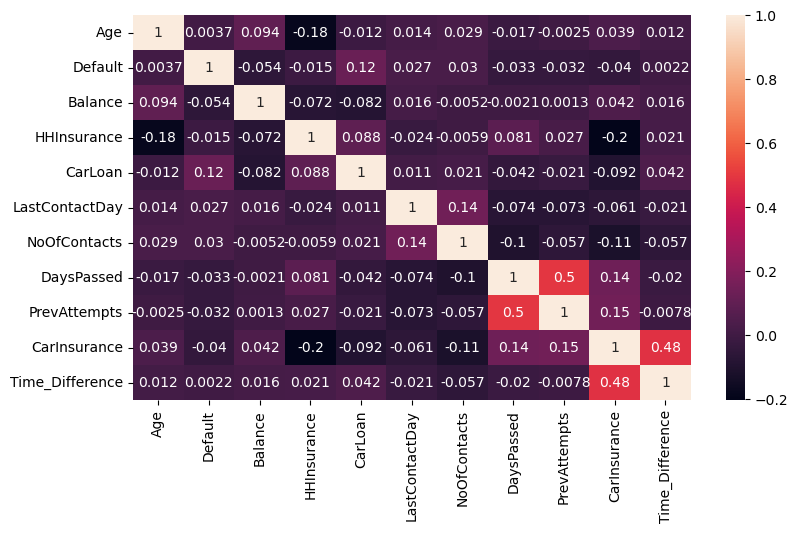

In [61]:
# Let us study the heat map Correlation for multi-collinearity to check assumption 5
plt.figure(figsize=(9,5))
sns.heatmap(df_nums.corr(), annot=True)


Lets Drop Time_Difference variable

In [62]:
import statsmodels.api as sm
x = df_final[['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Job_admin.', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Marital_divorced',
       'Marital_married', 'Marital_single', 'Education_primary',
       'Education_secondary', 'Education_tertiary', 'Communication_cellular',
       'Communication_telephone', 'LastContactMonth_apr',
       'LastContactMonth_aug', 'LastContactMonth_dec', 'LastContactMonth_feb',
       'LastContactMonth_jan', 'LastContactMonth_jul', 'LastContactMonth_jun',
       'LastContactMonth_mar', 'LastContactMonth_may', 'LastContactMonth_nov',
       'LastContactMonth_oct', 'LastContactMonth_sep']]
y = df_final['CarInsurance']
x = sm.add_constant(x)

In [63]:
logit_model = sm.Logit(y,x)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.593240
         Iterations 6


In [64]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CarInsurance   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3964
Method:                           MLE   Df Model:                           35
Date:                Fri, 21 Jul 2023   Pseudo R-squ.:                  0.1191
Time:                        20:09:31   Log-Likelihood:                -2373.0
converged:                       True   LL-Null:                       -2693.7
Covariance Type:            nonrobust   LLR p-value:                1.456e-112
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1780   3.65e+06   4.88e-08      1.000   -7.15e+06    7.15e+06
Age                         0.0052      0.004      1.253      0.210      -0.003       0.013
Default                    -0.3690      0.320     -1.152      0.249      -0.997       0.259
Balance                  8.686e-06   9.84e-06      0.883      0.377   -1.06e-05     2.8e-05
HHInsurance                -0.6646      0.082     -8.109      0.000      -0.825      -0.504
CarLoan                    -0.3110      0.112     -2.784      0.005      -0.530      -0.092
LastContactDay             -0.0103      0.005     -2.191      0.028      -0.020      -0.001
NoOfContacts               -0.0710      0.016     -4.517      0.000      -0.102      -0.040
DaysPassed                  0.0013      0.000      3.124      0.002       0.000       0.002
PrevAttempts                0.1038      0.024      4.249      0.000       0.056       0.152
Job_admin.                  0.0546        nan        nan        nan         nan         nan
Job_blue-collar            -0.1338        nan        nan        nan         nan         nan
Job_entrepreneur           -0.4541        nan        nan        nan         nan         nan
Job_housemaid              -0.2996        nan        nan        nan         nan         nan
Job_management             -0.1080        nan        nan        nan         nan         nan
Job_retired                 0.3008        nan        nan        nan         nan         nan
Job_self-employed          -0.1824        nan        nan        nan         nan         nan
Job_services               -0.0954        nan        nan        nan         nan         nan
Job_student                 0.6018        nan        nan        nan         nan         nan
Job_technician             -0.0464        nan        nan        nan         nan         nan
Job_unemployed              0.5404        nan        nan        nan         nan         nan
Marital_divorced            0.1173        nan        nan        nan         nan         nan
Marital_married            -0.1301        nan        nan        nan         nan         nan
Marital_single              0.1908        nan        nan        nan         nan         nan
Education_primary          -0.0614        nan        nan        nan         nan         nan
Education_secondary        -0.0450        nan        nan        nan         nan         nan
Education_tertiary          0.2844        nan        nan        nan         nan         nan
Communication_cellular      0.1132        nan        nan        nan         nan         nan
Communication_telephone     0.0648        nan        nan        nan         nan         nan
LastContactMonth_apr        0.0855        nan        nan        nan         nan         nan
LastContactMonth_aug       -0.7018        nan        nan        nan         nan         nan
LastContactMonth_dec        1.0839        nan        nan        nan         nan         nan
LastContactMonth_feb 

In [65]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                  Pseudo R-squared:       0.119      
Dependent Variable:         CarInsurance           AIC:                    4817.9230  
Date:                       2023-07-21 20:09       BIC:                    5044.5088  
No. Observations:           4000                   Log-Likelihood:         -2373.0    
Df Model:                   35                     LL-Null:                -2693.7    
Df Residuals:               3964                   LLR p-value:            1.4559e-112
Converged:                  1.0000                 Scale:                  1.0000     
No. Iterations:             6.0000                                                    
--------------------------------------------------------------------------------------
                         Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
--------------------------------------------------------------------------------------
const                    0.1780 3646897.3632  0.0000 1.0000 -7147787.3092 7147787.6651
Age                      0.0052       0.0042  1.2533 0.2101       -0.0029       0.0134
Default                 -0.3690       0.3203 -1.1520 0.2493       -0.9968       0.2588
Balance                  0.0000       0.0000  0.8831 0.3772       -0.0000       0.0000
HHInsurance             -0.6646       0.0820 -8.1091 0.0000       -0.8252      -0.5040
CarLoan                 -0.3110       0.1117 -2.7842 0.0054       -0.5299      -0.0921
LastContactDay          -0.0103       0.0047 -2.1909 0.0285       -0.0195      -0.0011
NoOfContacts            -0.0710       0.0157 -4.5174 0.0000       -0.1018      -0.0402
DaysPassed               0.0013       0.0004  3.1243 0.0018        0.0005       0.0020
PrevAttempts             0.1038       0.0244  4.2489 0.0000        0.0559       0.1517
Job_admin.               0.0546          nan     nan    nan           nan          nan
Job_blue-collar         -0.1338          nan     nan    nan           nan          nan
Job_entrepreneur        -0.4541          nan     nan    nan           nan          nan
Job_housemaid           -0.2996          nan     nan    nan           nan          nan
Job_management          -0.1080          nan     nan    nan           nan          nan
Job_retired              0.3008          nan     nan    nan           nan          nan
Job_self-employed       -0.1824          nan     nan    nan           nan          nan
Job_services            -0.0954          nan     nan    nan           nan          nan
Job_student              0.6018          nan     nan    nan           nan          nan
Job_technician          -0.0464          nan     nan    nan           nan          nan
Job_unemployed           0.5404          nan     nan    nan           nan          nan
Marital_divorced         0.1173          nan     nan    nan           nan          nan
Marital_married         -0.1301          nan     nan    nan           nan          nan
Marital_single           0.1908          nan     nan    nan           nan          nan
Education_primary       -0.0614          nan     nan    nan           nan          nan
Education_secondary     -0.0450          nan     nan    nan           nan          nan
Education_tertiary       0.2844          nan     nan    nan           nan          nan
Communication_cellular   0.1132          nan     nan    nan           nan          nan
Communication_telephone  0.0648          nan     nan    nan           nan          nan
LastContactMonth_apr     0.0855          nan     nan    nan           nan          nan
LastContactMonth_aug    -0.7018          nan     nan    nan           nan          nan
LastContactMonth_dec     1.0839          nan     nan    nan           nan          nan
LastContactMonth_feb    -0.3088          nan     nan    nan           na

## Model Validation

In [66]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [68]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\sagar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
## Get prediction on test data using trauned model
## Store the prediction in y_pred object
y_pred = logreg.predict(x_test)

In [70]:
print(y_pred)

[0 0 0 ... 1 1 0]


In [71]:
print('Accuracy of the log Regn Classifier on Test data is: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of the log Regn Classifier on Test data is: 0.70


the logistic regression classifier correctly predicted 70% of the instances in the test data.

## Building the Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[623 110]
 [254 213]]


In [73]:
y_test

3218    0
883     0
367     0
2226    0
2578    0
       ..
3268    0
2175    0
3760    1
2298    1
2331    0
Name: CarInsurance, Length: 1200, dtype: int64

In [74]:
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [75]:
 import numpy as np

In [76]:
y_pred_df = pd.DataFrame(y_pred)

In [77]:
y_pred_df

,0
0,0
1,0
2,0
3,0
4,1
...,...
1195,0
1196,0
1197,1
1198,1


## Confusion Matrix Plot

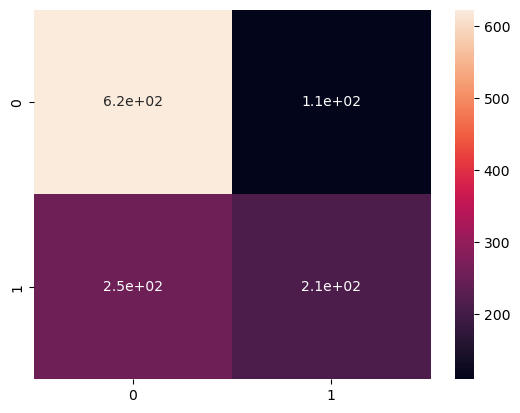

In [78]:
import seaborn as sn
sn.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

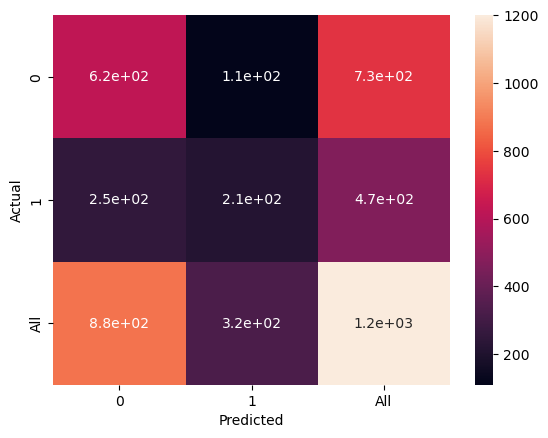

In [79]:
confusion_matrix_new = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [80]:
# print(metrics.accuracy_score(y_test, y_pred))
Accuracy = metrics.accuracy_score(y_test, y_pred)
print(Accuracy)

0.6966666666666667


In [81]:
Overall_Error_Rate = 1-Accuracy
print(Overall_Error_Rate)

0.30333333333333334


In [82]:
# print(metrics.precision_score(y_test, y_pred))
Precision = metrics.precision_score(y_test, y_pred)
print(Precision)

0.6594427244582043


the precision is approximately 0.6594, indicating that out of all the instances predicted as positive by the model, around 65.94% were correct, while the remaining were false positives.

In [83]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print(Sensitivity_recall)

0.45610278372591007


the sensitivity is approximately 0.456102 or 45.61%, indicating that the model correctly identified only around 45.61% of the actual positive instances, while the remaining positive instances were incorrectly classified as negative (false negatives)

In [84]:
Specificity = metrics.recall_score(y_test, y_pred, pos_label = 0)
print(Specificity)

0.849931787175989


the specificity is approximately 0.849931787175989 or 84.99%, indicating that the model correctly identified around 84.99% of the actual negative instances, while the remaining negative instances were incorrectly classified as positive (false positives).

In [85]:
# F-score is the harmonic mean of precision and sensitivity
# it considers both false positive and false negative cases and is good for imbalanced datasets.
# 2 * ((precision * sensitivity)/precision + sensitivity)
F1_score = metrics.f1_score(y_test, y_pred)

In [86]:
print({'Accuracy: ':Accuracy, "Precision: ":Precision, "Sensitivity_recall: ":Sensitivity_recall, "Specificity: ":Specificity,"F1_score":F1_score})

{'Accuracy: ': 0.6966666666666667, 'Precision: ': 0.6594427244582043, 'Sensitivity_recall: ': 0.45610278372591007, 'Specificity: ': 0.849931787175989, 'F1_score': 0.5392405063291139}


In [87]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive Rate":FPR,"False Negative Rate":FNR})

{'False Positive Rate': 0.15006821282401095, 'False Negative Rate': 0.5438972162740899}


In [88]:
# Hamming Loss is the fraction of targets that are misclassified
# also called as Overall Error Rate , Misclassification Rate

hamming_loss = metrics.hamming_loss(y_test, y_pred)
hamming_loss

0.30333333333333334

## Build ROC

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [90]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
# Defining method used for Roc and Auc
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
# Print probability data frame from column 2 which has Index = 1

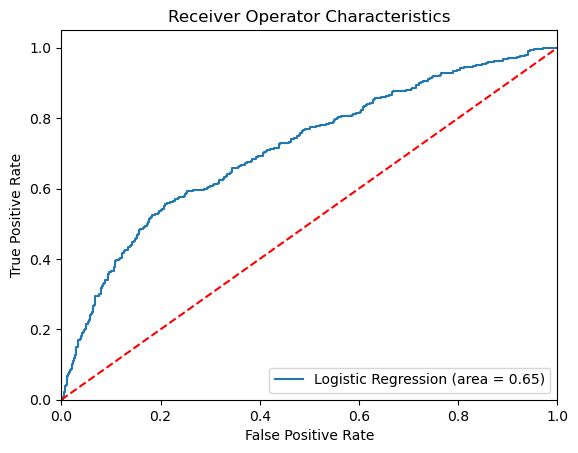

In [91]:
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

In [93]:
from sklearn.feature_selection import SelectKBest

In [96]:
import sklearn
from sklearn.feature_selection import mutual_info_classif

In [103]:
top_20=SelectKBest(mutual_info_classif,k=20)

In [104]:
top_20.fit(x_train,y_train)

SelectKBest(k=20,
            score_func=<function mutual_info_classif at 0x00000264D35F8E50>)

In [105]:
top_20.get_support()

array([False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False,  True,  True, False, False, False,
        True, False, False,  True,  True])

In [106]:
x_train.columns[top_20.get_support()]

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'Job_entrepreneur',
       'Job_housemaid', 'Job_management', 'Job_retired', 'Education_secondary',
       'Communication_cellular', 'LastContactMonth_apr',
       'LastContactMonth_dec', 'LastContactMonth_feb', 'LastContactMonth_mar',
       'LastContactMonth_oct', 'LastContactMonth_sep'],
      dtype='object')

In [108]:
sel_f=pd.DataFrame({'Feature':list(x_train.columns),
                   'Scores':top_20.scores_})
sel_f.sort_values(by = 'Scores', ascending=False)

,Feature,Scores
8,DaysPassed,0.050091
4,HHInsurance,0.031085
1,Age,0.024187
3,Balance,0.023114
7,NoOfContacts,0.018709
13,Job_housemaid,0.016899
14,Job_management,0.015967
9,PrevAttempts,0.015624
25,Education_secondary,0.014882
2,Default,0.011895


In [109]:
x_train=x_train[x_train.columns[top_20.get_support()]]

In [110]:
x_train.head()

,Age,Default,Balance,HHInsurance,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Education_secondary,Communication_cellular,LastContactMonth_apr,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_mar,LastContactMonth_oct,LastContactMonth_sep
2471,67,0,1146,0,13,1,92,2,0,0,0,1,1,1,0,0,0,0,0,0
2190,35,0,2646,0,14,8,183,2,0,0,1,0,0,1,1,0,0,0,0,0
1146,38,0,19,1,30,2,-1,0,0,0,0,0,1,1,0,0,0,0,0,0
3355,40,0,35,0,3,4,317,3,0,0,0,0,0,1,0,0,0,0,0,0
3926,46,0,57,0,28,1,-1,0,0,0,0,0,1,1,0,0,0,0,0,0


In [124]:
x_train.shape

(2800, 20)

In [111]:
y_train.head()

2471    1
2190    1
1146    1
3355    0
3926    1
Name: CarInsurance, dtype: int64

In [112]:
x_test=x_test[x_test.columns[top_20.get_support()]]
x_test.head()

,Age,Default,Balance,HHInsurance,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Education_secondary,Communication_cellular,LastContactMonth_apr,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_mar,LastContactMonth_oct,LastContactMonth_sep
3218,35,0,3168,0,22,30,-1,0,0,0,1,0,0,1,0,0,0,0,0,0
883,29,0,723,0,17,1,-1,0,0,0,0,0,1,1,0,0,0,0,0,0
367,33,0,647,1,4,1,273,1,0,0,0,0,1,1,0,0,1,0,0,0
2226,45,0,3007,0,11,1,-1,0,0,0,0,0,1,1,0,0,0,0,0,0
2578,34,0,3404,1,8,1,139,5,0,0,0,0,0,1,1,0,0,0,0,0


In [141]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\sagar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [142]:
## Get prediction on test data using trauned model
## Store the prediction in y_pred object
y_pred = logreg.predict(x_test)

In [143]:
print(y_pred)

[0 0 0 ... 1 1 1]


In [144]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,recall_score,precision_score,f1_score

In [145]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[631 102]
 [281 186]]


In [146]:
y_test

3218    0
883     0
367     0
2226    0
2578    0
       ..
3268    0
2175    0
3760    1
2298    1
2331    0
Name: CarInsurance, Length: 1200, dtype: int64

In [147]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [148]:
import numpy as np

In [149]:
y_pred_df = pd.DataFrame(y_pred)

In [150]:
y_pred_df

,0
0,0
1,0
2,0
3,0
4,1
...,...
1195,0
1196,0
1197,1
1198,1


## Confusion Matrix Plot

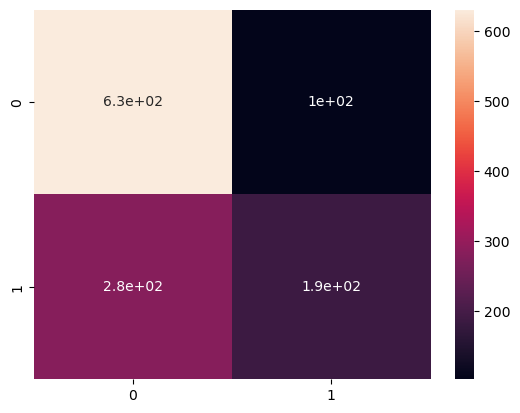

In [151]:
import seaborn as sn
sn.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

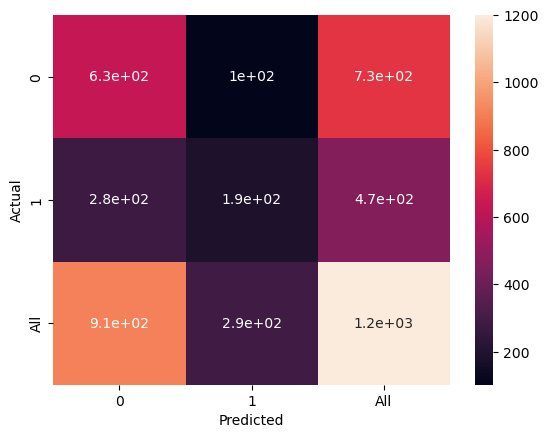

In [152]:
confusion_matrix_new = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [153]:
# print(metrics.accuracy_score(y_test, y_pred))
Accuracy = metrics.accuracy_score(y_test, y_pred)
print(Accuracy)

0.6808333333333333


In [154]:
Overall_Error_Rate = 1-Accuracy
print(Overall_Error_Rate)

0.3191666666666667


In [155]:
# print(metrics.precision_score(y_test, y_pred))
Precision = metrics.precision_score(y_test, y_pred)
print(Precision)

0.6458333333333334


In [156]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print(Sensitivity_recall)

0.39828693790149894


In [157]:
Specificity = metrics.recall_score(y_test, y_pred, pos_label = 0)
print(Specificity)

0.8608458390177354


In [158]:
# F-score is the harmonic mean of precision and sensitivity
# it considers both false positive and false negative cases and is good for imbalanced datasets.
# 2 * ((precision * sensitivity)/precision + sensitivity)
F1_score = metrics.f1_score(y_test, y_pred)

In [159]:
print({'Accuracy: ':Accuracy, "Precision: ":Precision, "Sensitivity_recall: ":Sensitivity_recall, "Specificity: ":Specificity,"F1_score":F1_score})

{'Accuracy: ': 0.6808333333333333, 'Precision: ': 0.6458333333333334, 'Sensitivity_recall: ': 0.39828693790149894, 'Specificity: ': 0.8608458390177354, 'F1_score': 0.49271523178807947}


In [160]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive Rate":FPR,"False Negative Rate":FNR})

{'False Positive Rate': 0.13915416098226463, 'False Negative Rate': 0.6017130620985011}


In [161]:
# Hamming Loss is the fraction of targets that are misclassified
# also called as Overall Error Rate , Misclassification Rate

hamming_loss = metrics.hamming_loss(y_test, y_pred)
hamming_loss

0.31916666666666665

# Build ROC

In [162]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [163]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
# Defining method used for Roc and Auc
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
# Print probability data frame from column 2 which has Index = 1

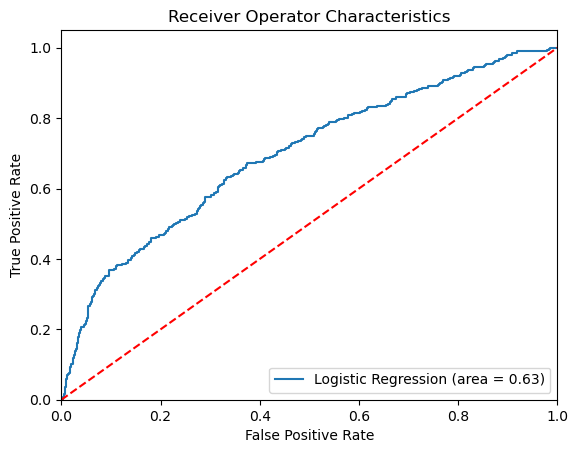

In [164]:
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

## the Base Model with an AUC-ROC of 0.65 has a higher AUC-ROC value compared to the Model with Feature Selection, which has an AUC-ROC of 0.63

The Base Model has higher accuracy (0.6967) compared to the Model with Feature Selection (0.6808).

The Base Model has slightly higher precision (0.6594) than the Model with Feature Selection (0.6458).

The Base Model has higher sensitivity/recall (0.4561) compared to the Model with Feature Selection (0.3983).

The Base Model has slightly lower specificity (0.8499) than the Model with Feature Selection (0.8608).

The F1-score of the Base Model (0.5392) is slightly higher than the Model with Feature Selection (0.4927).

The false positive rate of the Base Model (0.1501) is slightly higher than the Model with Feature Selection (0.1392).

The false negative rate of the Base Model (0.5439) is higher than the Model with Feature Selection (0.6017).


# the Base Model generally performs slightly better than the Model with Feature Selection in terms of accuracy, sensitivity/recall, F1-score, and false positive rate